# **«Оптимизация онбординга в первую сессию»**

**Описание**


Компания — SaaS бизнес, платформа по созданию чат ботов. Целевая аудитория - маркетологи и владельцы бизнесов. Компания недавно запустила интеграцию с Instagram - теперь в этом канале существует возможность запускать ботов. В следствии этого на платформу пришло много нового трафика, в том числе пользователей, которые сталкиваются с чат ботами впервые. \

Вы — продуктовый аналитик компании и ваша цель помочь продакт менеджеру повысить метрику активации в первой сессии. Под активацией мы понимаем набор ботом 100 контактов за 14 первых дней. Эта метрика берется исходя из предположения, что активированные пользователи могут получить больше ценности от платформы и будут иметь больше мотивации оплатить платную подписку. \

В качестве исходных данных вам дали события, которые генерировали пользователи в продукте в период с 2021-09-18 — 2021-11-23. \

**Задача** \

Вы вместе с продакт менеджером решили копнуть в поведение пользователей в первую сессию, для того, чтобы сделать обучение и/или понять с кем лучше проводить качественные исследования. Для этого вам нужно сделать следующие шаги: \

1. Разбить ивенты на сессии (сессия = множество ивентов пользователя, между которыми проходит менее 30 минут)
2. Выделить сегменты на основе данных поведения пользователей в первой сессии (сделать кластеры)
3. Описать сегменты из бизнес смысла.
        Пример, как мы представляем описание сегментов:
        - сегмент 1: пользователи, которые после подключения канала уходят из продукта и у них нет первой сессии в первый день
        - сегмент 2: мотивированные пользователи, которые в первую сессию активно проходят онбординг
4. Сформулировать рекомендации: какие сегменты стоит брать в первую очередь и почему.

### Подготовка к работе

Импорт бибилиотек

In [ ]:
!pip install pandas==1.3.0
import pandas as pd
!pip3 install retentioneering==2.0.3.2
import retentioneering
print('pandas_version', pd.__version__)
print('retentioneering_version', retentioneering.__version__)
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
sns.set()

Загрузка данных

In [ ]:
df_orig = pd.read_csv('/content/drive/MyDrive/Kaggle/Тестовые к вакансиям/6 Карьерный цех, Аналитик, 2022, весна. 22.03 /Задание, черновики/Dataset for Career Factory 22032022.zip')
print(df_orig.shape)
df_orig.head()

(869278, 25)


,Unnamed: 0,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,support_provided,...,first_account_for_user,current_account_status,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm
0,0,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,mobile.automations_list__opened,2021-10-05 21:10:36.267423
1,1,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,mobile.audience__open,2021-10-05 21:10:35.395335
2,2,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,mobile.dialog_list__open,2021-10-05 21:10:29.657045
3,3,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,todo_list_item.try_ig_automation.started,2021-10-05 20:42:06.134447
4,4,1,2021-10-05 20:36:07.068230,100000,2021-10-05 20:33:30.173973,1st admin,Asia,Other,Recommended by friend or colleague,False,...,True,free,9679,NaN,NaN,NaN,NaN,NaN,web.home_tab.todo_list.shown,2021-10-05 20:41:28.228258


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869278 entries, 0 to 869277
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  869278 non-null  int64  
 1   account_id                  869278 non-null  int64  
 2   account_creationdate        869039 non-null  object 
 3   client_id                   869278 non-null  int64  
 4   client_creationdate         867655 non-null  object 
 5   admin_status                869278 non-null  object 
 6   country_group               860573 non-null  object 
 7   industry                    869278 non-null  object 
 8   hear_source                 869278 non-null  object 
 9   support_provided            869278 non-null  bool   
 10  initial_channel             869278 non-null  object 
 11  ig_followerscount           869276 non-null  float64
 12  ig_enable_dttm              869278 non-null  object 
 13  traffic_source

In [ ]:
# Поиск дубликатов
df_orig.duplicated().sum()

0

In [ ]:
# NaN'ы
df_orig.isna().sum()

Unnamed: 0                         0
account_id                         0
account_creationdate             239
client_id                          0
client_creationdate             1623
admin_status                       0
country_group                   8705
industry                           0
hear_source                        0
support_provided                   0
initial_channel                    0
ig_followerscount                  2
ig_enable_dttm                     0
traffic_source                     0
first_device_type_of_user          0
first_account_for_user             0
current_account_status           239
ltv_predicted                      0
ig_activation_dttm            670993
trial_dttm                    592563
paid_dttm                     706829
pro_dttm                      579375
first_ig_flow_publish_dttm    450410
event_name                      1307
event_dttm                      1230
dtype: int64

In [ ]:
# Трансформация датафрейма
df = df_orig.copy(deep=True)
date_cols = ['event_dttm', 'ig_enable_dttm', 'trial_dttm', 'paid_dttm', 
             'pro_dttm', 'first_ig_flow_publish_dttm','ig_activation_dttm']
df[date_cols] = df[date_cols].apply(pd.to_datetime)
df['account_creationdate'] = pd.to_datetime(df.account_creationdate)
df['client_creationdate'] = pd.to_datetime(df.client_creationdate)
df = df[df.event_dttm.notna()]
df['trial'] = df.trial_dttm.notna().astype(int)
df['paid'] = df.paid_dttm.notna().astype(int)

# Итоговый датафрейм
df = (df.sort_values('event_dttm').reset_index(drop=True)
                                 .reset_index()
                                 .rename(columns = {'Unnamed: 0':'old_index'}))
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,index,old_index,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,...,ltv_predicted,ig_activation_dttm,trial_dttm,paid_dttm,pro_dttm,first_ig_flow_publish_dttm,event_name,event_dttm,trial,paid
0,0,576730,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,4950,2021-10-06 06:35:17.987624,2021-09-27 09:11:10.956989,2021-10-04 09:11:51,2021-09-27 09:11:09,2021-09-26 22:10:45.769084,web.page_questionnaire.todo_list_personalizati...,2021-09-18 00:05:41.540423,1,1
1,1,576729,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,4950,2021-10-06 06:35:17.987624,2021-09-27 09:11:10.956989,2021-10-04 09:11:51,2021-09-27 09:11:09,2021-09-26 22:10:45.769084,todo_list_item.verify_email.done,2021-09-18 00:05:56.566245,1,1
2,2,576728,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,4950,2021-10-06 06:35:17.987624,2021-09-27 09:11:10.956989,2021-10-04 09:11:51,2021-09-27 09:11:09,2021-09-26 22:10:45.769084,todo_list_item.connect_ig_account.done,2021-09-18 00:05:56.566554,1,1
3,3,576727,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,4950,2021-10-06 06:35:17.987624,2021-09-27 09:11:10.956989,2021-10-04 09:11:51,2021-09-27 09:11:09,2021-09-26 22:10:45.769084,todo_list_item.verify_email.done,2021-09-18 00:05:56.566709,1,1
4,4,576726,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,4950,2021-10-06 06:35:17.987624,2021-09-27 09:11:10.956989,2021-10-04 09:11:51,2021-09-27 09:11:09,2021-09-26 22:10:45.769084,todo_list_item.connect_ig_account.done,2021-09-18 00:05:56.567040,1,1


## ЗАДАЧА 1. 
Разбить ивенты на сессии (сессия = множество ивентов пользователя, между которыми проходит менее 30 минут)

In [ ]:
# Интервал между действиями каждого пользователя
df['diff'] = df.sort_values('event_dttm').groupby('client_id')['event_dttm'].diff(1)

In [ ]:
# Датафрейм с началом сессий, если отсутствуют логи в течении 30 минут
session_start = df[(df['diff'].isnull()) | (df['diff'] > '1800 seconds')]
session_start['session_id'] = session_start['index']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
# Добавление индекса сессии в датефрейм
df = df.sort_values('index')
session_start = session_start.sort_values('index')
df = pd.merge_asof(df.sort_values('index'), session_start.sort_values('index')[['index','client_id','session_id']],on='index',by='client_id')

In [ ]:
# Определение времени каждого ивента
df['start_session'] = df['index'] == df['session_id']
df['event_time'] = df.groupby(['session_id'])['event_dttm'].diff(1)
df['event_time'] = df.groupby(['session_id'])['event_time'].shift(-1)
df['event_time'] = df['event_time'] / np.timedelta64(1, 's')

In [ ]:
# Первый ивент пользователя
df_first_event_time = df.groupby('client_id').event_dttm.min().rename('first_event_time').to_frame().reset_index()
df = df.join(df_first_event_time.set_index('client_id'), on='client_id')

In [ ]:
# количество ивентов на пользователя за 14 дней
df['less_14_days'] = ((df.event_dttm - df.first_event_time) < datetime.timedelta(days = 14))
# Определение активации пользователя
count_event = (df.groupby('client_id').agg({'less_14_days':sum})
                                     .rename(columns={'less_14_days':'activated'}))

In [ ]:
# количество ивентов на пользователя за 14 дней
df['less_14_days'] = ((df.event_dttm - df.first_event_time) < datetime.timedelta(days = 14))

# Определение активации пользователя и число ивентов в первые 14 дней
count_event = (df.groupby('client_id').agg({'less_14_days':sum})
                                     .rename(columns={'less_14_days':'activated'}))
df = df.join(count_event.rename(columns={'activated':'count_evenst'}),  on='client_id')
count_event[count_event.activated < 100] = 0
count_event[count_event.activated >= 100] = 1
df = df.join(count_event.reset_index().set_index('client_id'),  on='client_id')

In [ ]:
# Датафрейм с первыми сессиями для исследования
first_session = df.groupby(['client_id']).session_id.min().to_list()
df_first_session = df[df['session_id'].isin(first_session)]

In [ ]:
# Готовый датафрейм первых сессий
df_first_session.head()

,index,old_index,account_id,account_creationdate,client_id,client_creationdate,admin_status,country_group,industry,hear_source,...,trial,paid,diff,session_id,start_session,event_time,first_event_time,less_14_days,count_evenst,activated
0,0,576730,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,1,1,NaT,0,True,15.025822,2021-09-18 00:05:41.540423,True,47,0
1,1,576729,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,1,1,0 days 00:00:15.025822,0,False,0.000309,2021-09-18 00:05:41.540423,True,47,0
2,2,576728,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,1,1,0 days 00:00:00.000309,0,False,0.000155,2021-09-18 00:05:41.540423,True,47,0
3,3,576727,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,1,1,0 days 00:00:00.000155,0,False,0.000331,2021-09-18 00:05:41.540423,True,47,0
4,4,576726,16069,2021-09-18 00:04:54.497216,108119,2021-09-16 13:09:05.036737,1st admin,South America,Personal blog,Recommended by friend or colleague,...,1,1,0 days 00:00:00.000331,0,False,1.930419,2021-09-18 00:05:41.540423,True,47,0


In [ ]:
# Параменты всех сессий
print(df['client_id'].nunique()) # Количество пользователей
print(df['session_id'].nunique()) # Количество сессий
print(df['index'].count()/df['session_id'].nunique()) # Количество ивентов за сессию
print(df['count_evenst'].mean()) # число ивентов за 14 дней
print(df['event_time'].mean()) # Среднее время ивента, сек.

15091
48242
17.993615521744537
266.74325958933144
43.70668370848518


In [ ]:
# Параметры первых сессий
print(df_first_session['client_id'].nunique()) # Количество пользователей
print(df_first_session['session_id'].nunique()) # Количество сессий
print(df_first_session['index'].count()/df_first_session['session_id'].nunique()) # Количество ивентов за сессию
print(df_first_session['count_evenst'].mean()) # число ивентов за 14 дней
print(df_first_session['event_time'].mean()) # Среднее время ивента, сек.

15091
15091
24.571466436949176
94.97053731311082
34.78849828581392


## ЗАДАЧА 2.
Выделить сегменты на основе данных поведения пользователей в первой сессии (сделать кластеры)

**Определение оптимального количества кластеров**

In [ ]:
# Копируем датафрейм
df_count_clasters = df_first_session.copy(deep=True)

# Категориальные переменные
cat_cols = df_count_clasters.select_dtypes(include=['object']).columns.tolist()
# числовые переменные
num_cols = df_count_clasters.select_dtypes(exclude=['object', 'datetime64', 'timedelta64']).columns.tolist()
# фичи для опреление числа кластеров
cols_for_claster = num_cols + cat_cols
# Применим LabelEncoder к категориальным колонкам
df_count_clasters[cat_cols] = df_count_clasters[cat_cols].apply(LabelEncoder().fit_transform)
# удаление NaN
df_count_clasters.dropna(axis = 0, inplace= True)
# Датафрейм для определения числа кластеров
df_count_clasters = df_count_clasters[cols_for_claster].drop(['index',
                                                              'old_index'], axis = 1)

In [ ]:
# Масштабирование данных
scaler = MinMaxScaler()
df_count_clasters_scaled=scaler.fit_transform(df_count_clasters)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



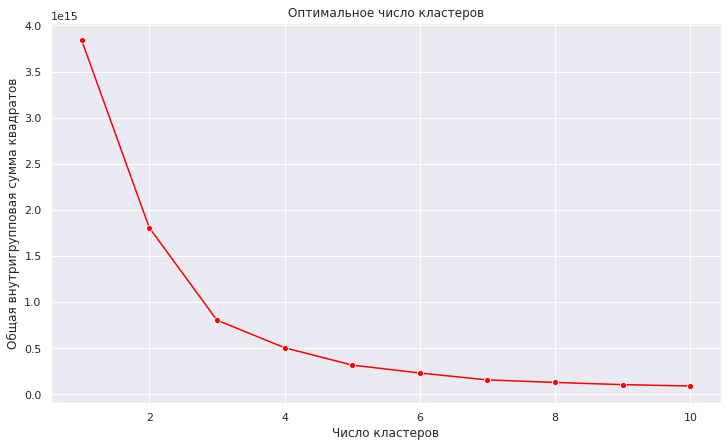

In [ ]:
# Определение оптимального количества кластеров используя "Elbow method".

score_k_means = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_count_clasters)
    score_k_means.append(kmeans.inertia_)

# Визуализация
plt.figure(figsize=(12,7))
sns.lineplot(range(1, 11), score_k_means,marker='o',color='red')
plt.title('Оптимальное число кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Общая внутригрупповая сумма квадратов')
plt.show()

**Вывод:** Примем за оптимальное количество 5 кластеров

**Создание кластеров**

In [ ]:
retentioneering.config.update({
    'user_col': 'client_id',
    'event_col':'event_name',
    'event_time_col':'event_dttm',
})

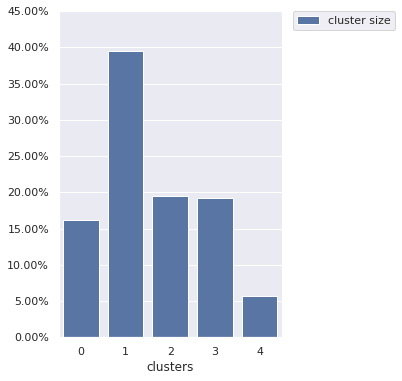

In [ ]:
# Размеры кластеров
df_first_session.rete.get_clusters(method='kmeans',
                       feature_type='tfidf',
                       n_clusters=5,
                       ngram_range=(1,2),
                       plot_type='cluster_bar');

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



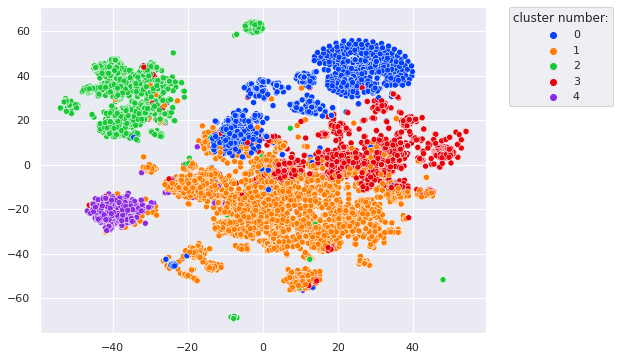

In [ ]:
# Графическое представление разделения на кластеры
# Выполнено методом уменьшения размерности, перобразующим многомерные данные в двумерный вектор
df_first_session.rete.project(plot_type = 'clusters',
                  method = 'tsne',
                  perplexity = 128);

In [ ]:
# Датафрейм по каждому отельному кластеру
df_cluster_0 = df_first_session.rete.filter_cluster(0)
df_cluster_1 = df_first_session.rete.filter_cluster(1)
df_cluster_2 = df_first_session.rete.filter_cluster(2)
df_cluster_3 = df_first_session.rete.filter_cluster(3)
df_cluster_4 = df_first_session.rete.filter_cluster(4)

# Пользователи по кластерам
cluster_0 = df_first_session.rete.cluster_mapping[0]
cluster_1 = df_first_session.rete.cluster_mapping[1]
cluster_2 = df_first_session.rete.cluster_mapping[2]
cluster_3 = df_first_session.rete.cluster_mapping[3]
cluster_4 = df_first_session.rete.cluster_mapping[4]

In [ ]:
# Добавление кластеров в датафрейм df_first_session
cluster_dict =  df_first_session.rete.cluster_mapping
rows = []
for claster_id, clients in cluster_dict.items():
  for client_id in clients:
    rows.append([claster_id, client_id])  
df_client_cluster = pd.DataFrame(rows, columns = ['cluster', 'client_id'])
df_first_session = df_first_session.join(df_client_cluster.set_index('client_id'), on='client_id')

In [ ]:
# Размеры кластров
df_first_session.drop_duplicates(subset=['client_id']).groupby('cluster')['client_id'].count()

cluster
0    2439
1    5967
2    2938
3    2892
4     855
Name: client_id, dtype: int64

In [ ]:
# Воронка основных этапов в кластерах
df_first_session.rete.funnel(targets = ['web.interface.dashboard.page_view',
                                        'todo_list_item.connect_ig_account.done',
                                         'web.onboarding.run',
                                         'todo_list_item.start_trial.done'],
                             groups = (cluster_0, cluster_1, cluster_2, cluster_3, cluster_4),
                             group_names = ('cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'))

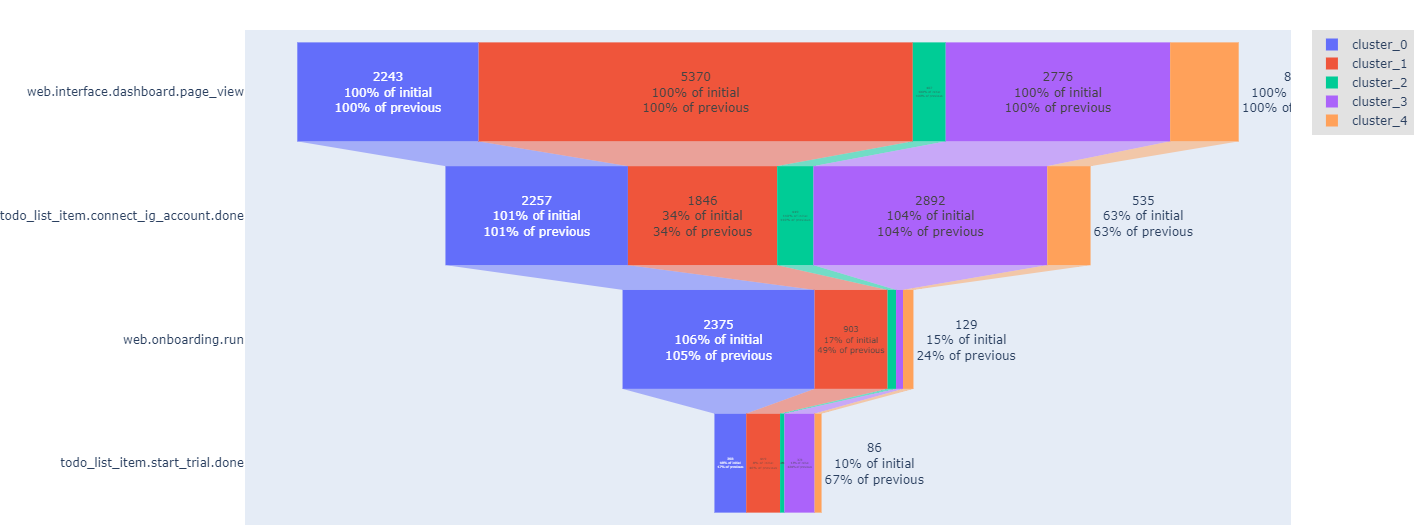

## ЗАДАЧА 3.
Описать сегменты из бизнес смысла. \


In [ ]:
# Описание кластеров

'''
КЛАСТЕР 0. Активно обучающиеся.    2439 человека (16%)

Описание кластра:
Пользоватли данного кластера активно проходят онбординг, верификацию, подключают trial-версию.
Имеют достаточно широкий граф логов. Что говорит об активном интересе. 
Активно пользуются всеми возможностями.
Также в данном кластере пользователи с самым большим количеством подсписчиков, в среднем 14000.
Однако имеют самый низкий показатель активации среди пользователей. 
Что говорит о том, пользователи будет ощущать низкую ценность в продукте.

Характеристики кластера:
- В 5 раз более частое прохождение онбординга, в сравнении с остальными кластрами.
- В 2 раза более частая верификация, в сравнении с остальными кластрами.
- Процент активированных пользователей       - 3,4%
- Desktop / Android / iOS                    - 79% / 10% / 11%
- Среднее количество подписчиков             - 9000
- Средняя длительность ивента в перую сессию - 43 секуды
- Средняя количество ивентов в перую сессию  - 43
- Первый аккаунт                             - 96% пользователей
- Начальный канал: IG / FB                   - 93% / 7%
- Источник трафика                           - Оргинический 81%
                                             - Поисковый    13%      
                                             - реферальный  6%
- Страна/регион                              - Южная Америка: 39%
                                             - Азия:          18%
                                             - Европа         12%
                                             - США            11%
- Сфера деятельности                         - Информационное предпринимательство 16%
                                             - Электронная коммерция              15%
                                             - Местный бизнес                     13%


КЛАСТЕР 1. Опытные пользователи.    5967 человека (40%)

Описание кластра:
Самый большой кластер. Составляют его опытные пользователи, которые активно изучают продукт. 
Имеют большое количество ивентов в первую сессию. Активно изучают все возможности, о чем говорит довольно разветвленный граф. 
Также первый аккаунт только у 59% пользователей.
Имеют высокий уровень активированных пользователей в 17.9%, что говорит о том, что пользователи находят в продукте ценность.

Характеристики кластера:
- Процент активированных пользователей       - 17,9%
- Desktop / Android / iOS                    - 84% / 10% / 6%
- Среднее количество подписчиков             - 9000
- Средняя длительность ивента в перую сессию - 28 секуды
- Средняя количество ивентов в перую сессию  - 69
- Первый аккаунт                             - 59% пользователей
- Начальный канал: IG / FB                   - 57% / 43%
- Источник трафика                           - Оргинический 93%
                                             - Поисковый    4%      
                                             - реферальный  3%
- Страна/регион                              - Азия:            30%
                                             - Южная Америка:   29%
                                             - Русскоговорящие: 12%
                                             - Европа:          9%
- Сфера деятельности                         - Электронная коммерция              15%
                                             - Информационное предпринимательство 16%
                                             - Профессиональный консалтинг        13%
                                             - Местный бизнес                     11%


КЛАСТЕР 2. Мобилки    2938 человека (20%)

Описание кластра:
Кластер пользователей использовавших почти всю первую сессию исключительно мобильные устройства(85%)
Примерно в одинаковом соотношении Android/iOS(48% / 37%) пользователей.
Низкий процент активированных пользователей. Хотя те пользователи, которые прошли онбординг в веб версии в 3 раза чаще активируются.

Характеристики кластера:
- Процент активированных пользователей       - 5,1%
- Desktop / Android / iOS                    - 15% / 48% / 37%
- Среднее количество подписчиков             - 4000
- Средняя длительность ивента в перую сессию - 29 секуды
- Средняя количество ивентов в перую сессию  - 28
- Первый аккаунт                             - 95% пользователей
- Начальный канал: IG / FB                   - 61% / 40%
- Источник трафика                           - Оргинический 81%
                                             - Поисковый    10%      
                                             - реферальный  9%
- Страна/регион                              - Азия:            36%
                                             - Южная Америка:   28%
                                             - Русскоговорящие: 11%
                                             - Европа:          8%
- Сфера деятельности                         - Информационное предпринимательство 10%
                                             - Электронная коммерция              8%
                                             - Местный бизнес                     6%


КЛАСТЕР 3. Без прохождения онбординга.    2892 человека (20%)

Описание кластра:
Большой процент пользователей, которые верифицируются и привязывают свой аккаунт в первую сессию.
Достаточно активно пользуются основными функциями веб версиию
Но вместе с тем обходят стороной прохождение онбординга в первую сессию.
Возможно не заинтереснованы в прохождении онбординга или предпочитают разбивать активность на несколько сессий и спокойно разбираться в продукте.
Имеют самые длительные ивенты, в 1,5 раза длиннее в сравнении с остальными кластерами.

Характеристики кластера:
- Процент активированных пользователей       - 7,5%
- Desktop / Android / iOS                    - 78% / 11% / 11%
- Среднее количество подписчиков             - 11000
- Средняя длительность ивента в перую сессию - 47 секуды
- Средняя количество ивентов в перую сессию  - 38
- Первый аккаунт                             - 97% пользователей
- Начальный канал: IG / FB                   - 99% / 1%
- Источник трафика                           - Оргинический 80%
                                             - Поисковый    11%      
                                             - реферальный  9%
- Страна/регион                              - Южная Америка: 47%
                                             - Азия:          17%
                                             - США            10%
- Сфера деятельности                         - Информационное предпринимательство 15%
                                             - Электронная коммерция              13%
                                             - Местный бизнес                     11%


КЛАСТЕР 4. Контруктора     855 человека (5%)

Описание кластра:
Активно вовлеченные пользователи, просидевшие в конструкторе ботов почти всю первую сесиии, что видно по матрице шагов и графу SJM.
У 67 % пользователей не первый аккаунт. Скорее всего это довольно опытные пользователи. 
Самое высое число активаций и подключений trial-версии именно в данном кластере 19,6%

Характеристики кластера:
- Процент активированных пользователей       - 19,6%
- Desktop / Android / iOS                    - 92% / 5% / 3%
- Среднее количество подписчиков             - 10000
- Средняя длительность ивента в перую сессию - 32 секуды
- Средняя количество ивентов в перую сессию  - 75
- Первый аккаунт                             - 67% пользователей
- Начальный канал: IG / FB                   - 87% / 13%
- Источник трафика                           - Оргинический 80%
                                             - Поисковый    15%      
                                             - реферальный  5%
- Страна/регион                              - Южная Америка:   39%
                                             - Азия:            20%
                                             - Русскоговорящие: 10%
- Сфера деятельности                         - Электронная коммерция              15%
                                             - Профессиональный консалтинг        11%
                                             - Местный бизнес                     11%

'''

### Логи

In [ ]:
# Разделение логов на 4 большие группы
df_first_session.event_name.apply(lambda x: str(x).split('.')[0]).value_counts()

web               288368
todo_list_item     42038
mobile             37311
system              3091
Name: event_name, dtype: int64

In [ ]:
# Топ 10 логов подгруппы 'web'
df_first_session[df_first_session.event_name.str.startswith('web')].event_name.value_counts().head(40)

web.interface.dashboard.page_view                           28302
web.page_view.content                                       18570
web.page_view.edit_content                                  16140
web.home_tab.todo_list.shown                                15156
web.builder_tab.quick_campaign_list.item.impression         11274
web.interface.settings.pageview                             10396
web.dashboard.product_tips.show                              9263
web.builder.starting_step_node_sidebar.opened                8619
web.builder.add_trigger.click                                8140
web.builder.node_menu.create_node                            7253
web.builder.floating_menu.delete_node                        7238
web.page_questionnaire.todo_list_personalization.shown       7039
web.builder.addtrigger.modal.add                             6476
web.builder.publish_attempt                                  5879
web.settings.instagram_section.open                          4968
web.broadc

In [ ]:
# Топ 10 логов подгруппы 'todo_list_item'
df_first_session[df_first_session.event_name.str.startswith('todo_list_item')].event_name.value_counts()

todo_list_item.connect_ig_account.done                          14399
todo_list_item.verify_email.done                                14158
todo_list_item.try_ig_automation.started                         4607
todo_list_item.do_keyword_onboarding_campaign.started            3510
todo_list_item.try_ig_automation.done                            3202
todo_list_item.start_trial.done                                  1718
todo_list_item.increase_engagement_and_organic_reach.started      181
todo_list_item.start_trial.started                                111
todo_list_item.redirect_customers_to_landing_page.started          55
todo_list_item.automate_answers_on_common_questions.started        50
todo_list_item.enable_story_mention_reply.started                  47
Name: event_name, dtype: int64

In [ ]:
# Топ 10 логов подгруппы 'mobile'
df_first_session[df_first_session.event_name.str.startswith('mobile')].event_name.value_counts().head(10)

mobile.automations_list__opened                                2593
mobile.automations_list__closed                                2489
mobile.automations_promo__opened                               2284
mobile.dialog_list__page_avatar                                2115
mobile.audience__open                                          1992
mobile.dialog_list__open                                       1814
mobile.conversation_starters_list__opened                      1285
mobile.edit_conversation_starter__question__opened             1231
mobile.automations_promo__closed                               1162
mobile.conversation_starters_list__empty_view__new__clicked    1134
Name: event_name, dtype: int64

In [ ]:
# Топ 10 логов подгруппы 'system'
df_first_session[df_first_session.event_name.str.startswith('system')].event_name.value_counts().head(10)

system.event_1     1380
system.event_3      168
system.event_2       99
system.event_7       50
system.event_9       46
system.event_4       40
system.event_30      33
system.event_18      32
system.event_5       31
system.event_16      30
Name: event_name, dtype: int64

In [ ]:
# 4 ключевых лога
df_first_session.event_name[(df_first_session.event_name == 'web.interface.dashboard.page_view') |
                            (df_first_session.event_name == 'todo_list_item.connect_ig_account.done') |
                            (df_first_session.event_name == 'web.onboarding.run') |
                            (df_first_session.event_name == 'todo_list_item.start_trial.done')].value_counts()

web.interface.dashboard.page_view         28302
todo_list_item.connect_ig_account.done    14399
web.onboarding.run                         4305
todo_list_item.start_trial.done            1718
Name: event_name, dtype: int64

### Сравнительные характеристики кластеров

In [ ]:
# Размеры кластров
df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['client_id'].count()

cluster
0    2439
1    5967
2    2938
3    2892
4     855
Name: client_id, dtype: int64

Числовой источник информации

In [ ]:
# Числовая информация из датафрема по кластерам
(df_first_session.drop_duplicates(subset='client_id')
                 .drop(['index', 'old_index', 'start_session', 
                        'less_14_days', 'account_id', 'client_id'], axis = 1)
                 .groupby('cluster').mean().round(3).T)

cluster,0,1,2,3,4
support_provided,0.021,0.086,0.009,0.011,0.033
ig_followerscount,14089.428,9188.463,4091.669,10892.538,10247.571
first_account_for_user,0.963,0.593,0.946,0.972,0.677
ltv_predicted,2427.053,2426.598,2441.158,2297.648,1974.909
trial,0.319,0.267,0.099,0.217,0.338
paid,0.173,0.155,0.043,0.098,0.198
session_id,360352.289,365353.670,370632.743,385375.577,180143.126
event_time,43.883,28.658,29.291,47.953,31.947
count_evenst,28.060,68.779,28.736,37.812,75.462
activated,0.034,0.179,0.051,0.075,0.196


Категориальные источники информации

In [ ]:
# Первый тип устройства пользователя
round(df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['first_device_type_of_user'].value_counts() / 
      df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['first_device_type_of_user'].count() * 100, 2)

cluster  first_device_type_of_user
0        Desktop                      79.21
         iOS                          11.03
         Android                       9.76
1        Desktop                      83.95
         Android                      10.37
         iOS                           5.68
2        Android                      47.92
         iOS                          36.59
         Desktop                      15.49
3        Desktop                      78.49
         iOS                          10.89
         Android                      10.62
4        Desktop                      92.05
         Android                       4.68
         iOS                           3.27
Name: first_device_type_of_user, dtype: float64

In [ ]:
# Первый тип устройства пользователя
round(df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['initial_channel'].value_counts() / 
      df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['initial_channel'].count() * 100, 2)

cluster  initial_channel
0        IG                 92.58
         FB                  7.13
         Other               0.29
1        IG                 56.98
         FB                 42.17
         Other               0.85
2        IG                 60.45
         FB                 39.18
         Other               0.37
3        IG                 99.90
         FB                  0.10
4        IG                 87.25
         FB                 12.05
         Other               0.70
Name: initial_channel, dtype: float64

In [ ]:
# Страна/регион
round(df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['country_group'].value_counts() / 
      df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['country_group'].count() * 100, 2)

In [ ]:
# Индустрия
round(df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['industry'].value_counts() / 
      df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['industry'].count() * 100, 2)

In [ ]:
# Откуда узнали
round(df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['hear_source'].value_counts() / 
      df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['hear_source'].count() * 100, 2)

In [ ]:
# Источник трафика
round(df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['traffic_source'].value_counts() / 
      df_first_session.drop_duplicates(subset='client_id').groupby('cluster')['traffic_source'].count() * 100, 2)

### Кластер 0. Активно обучающиеся

In [ ]:
df_cluster_0.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.3,
                     targets = {'todo_list_item.start_trial.done' :'green',
                                'todo_list_item.connect_ig_account.done' :'green',
                                'todo_list_item.do_keyword_onboarding_campaign.started':'green',
                                'todo_list_item.start_trial.done' :'green'})

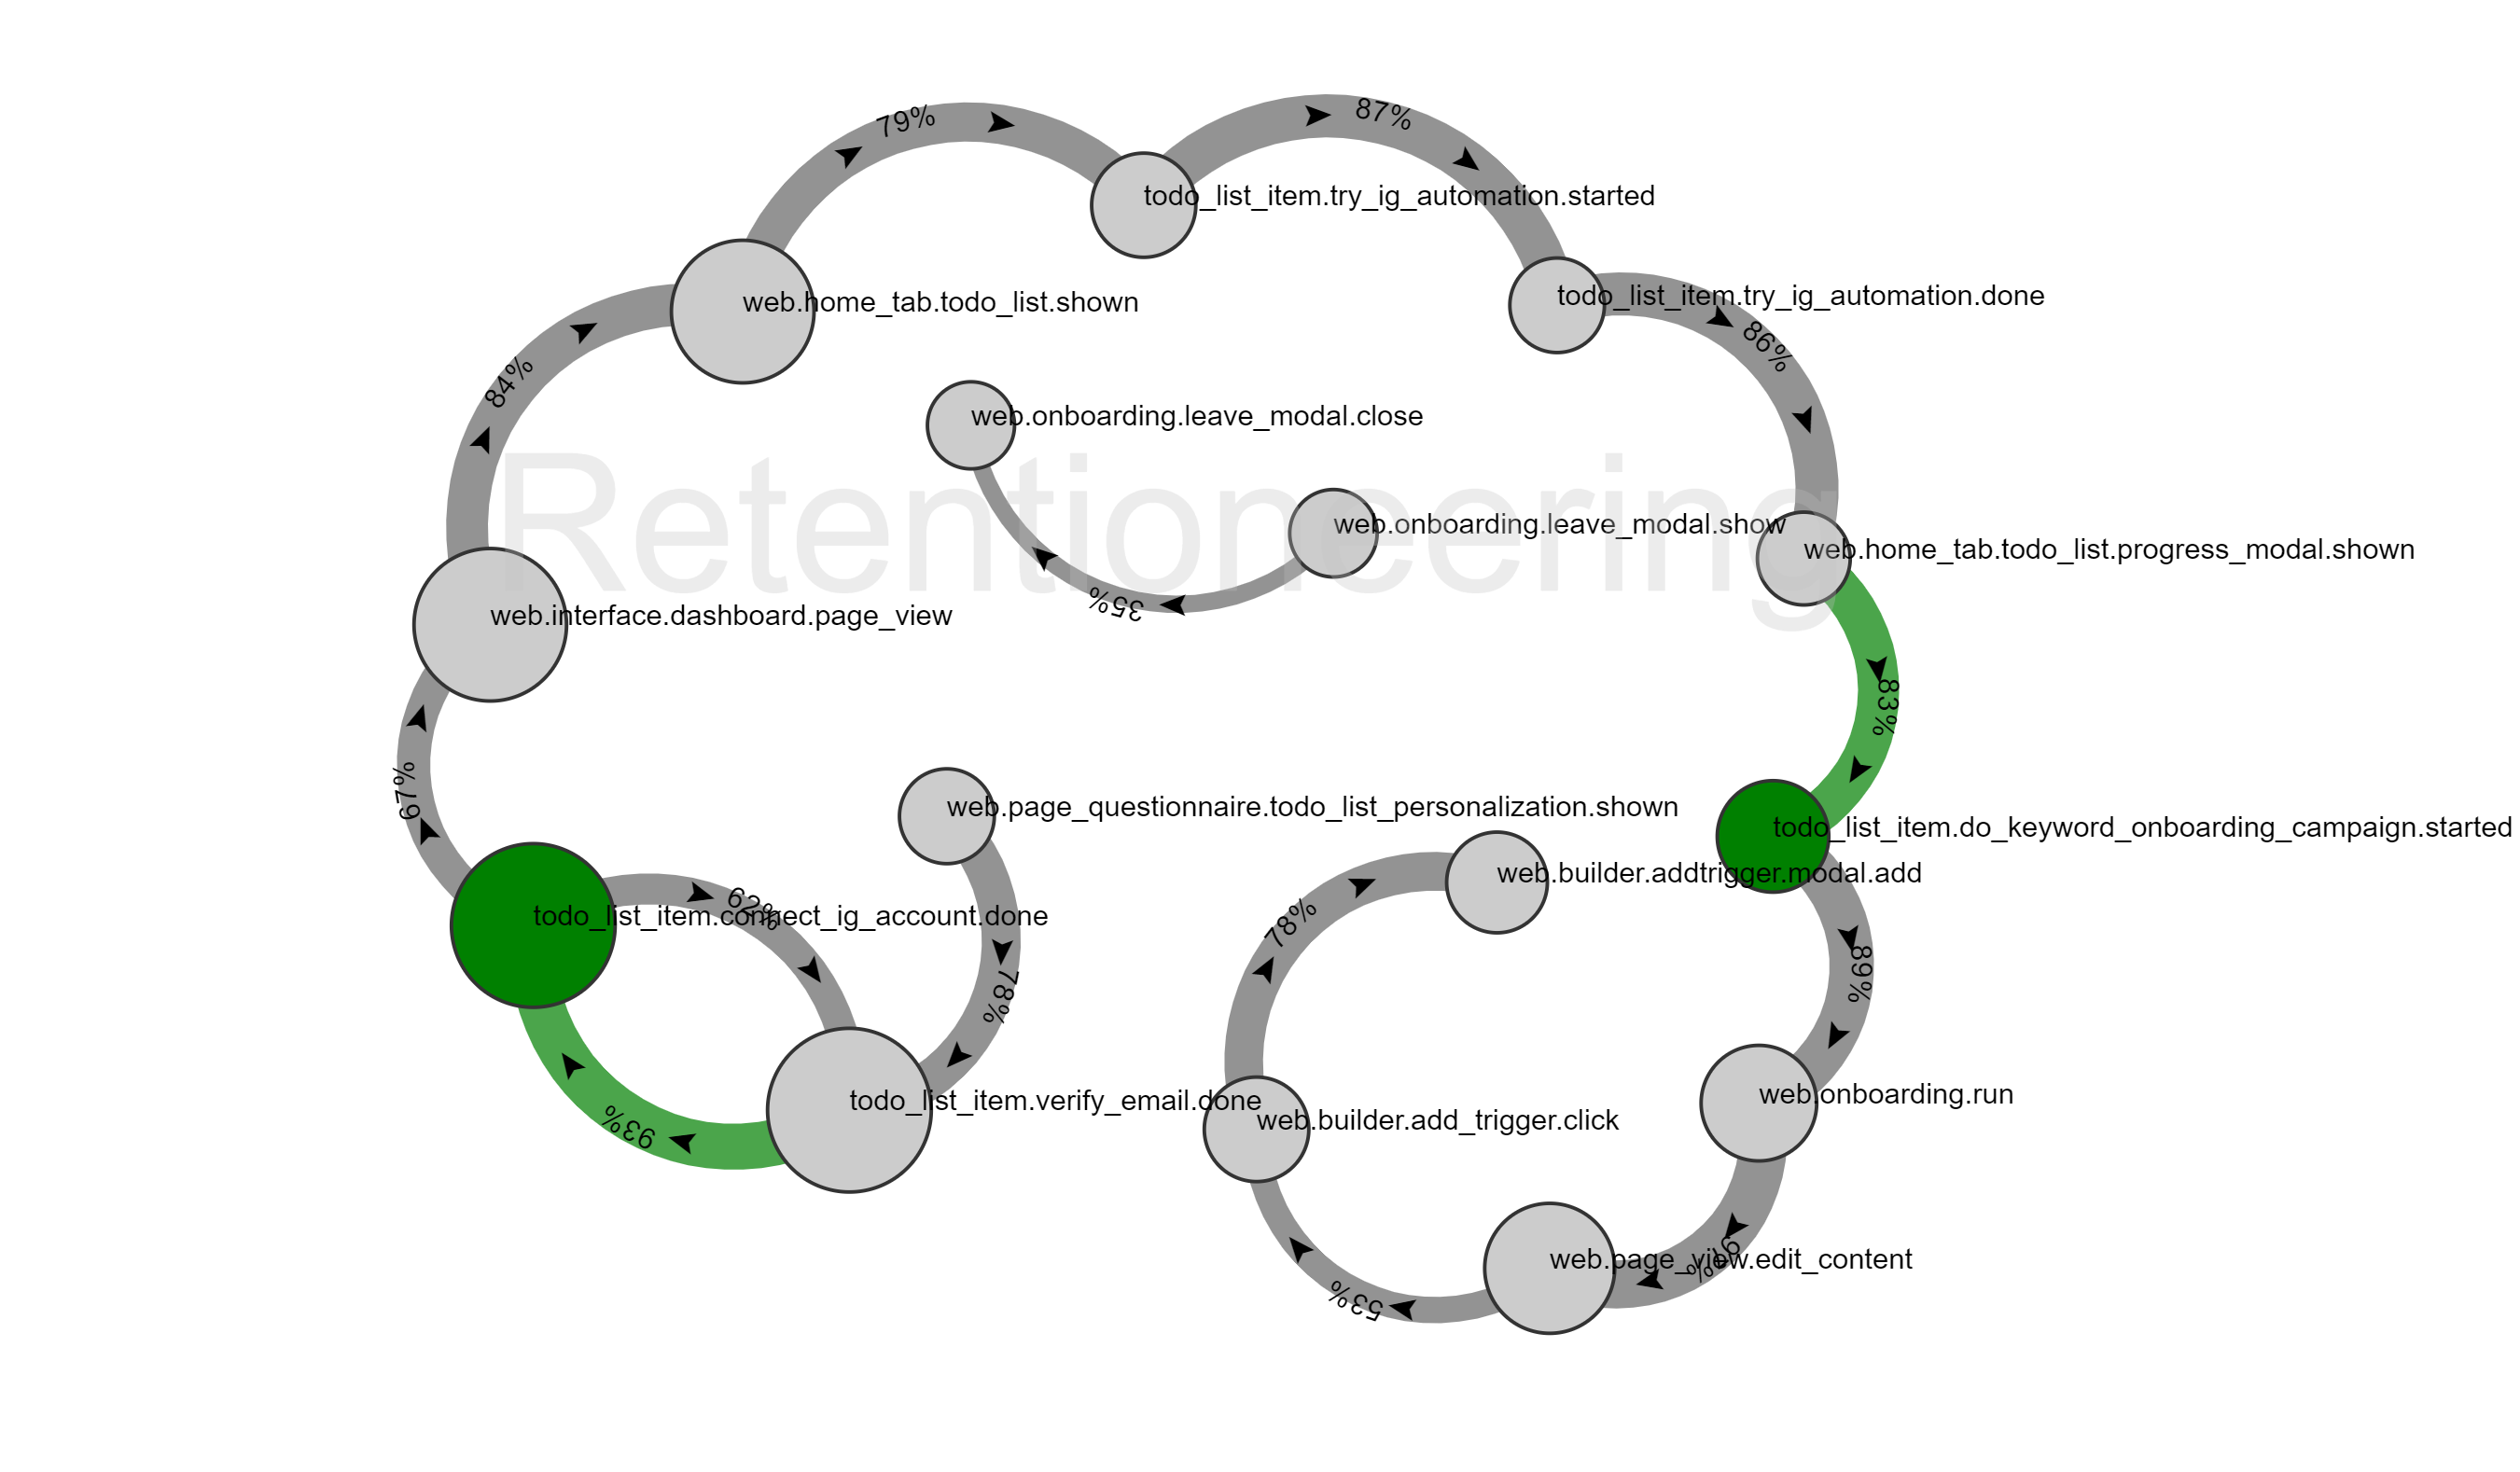

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
web.page_questionnaire.todo_list_personalization.shown,0.878639,0.007790,0.000410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.verify_email.done,0.018860,0.785158,0.121771,0.565396,0.031570,0.077901,0.022960,0.064371,0.002870,0.002870,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.connect_ig_account.done,0.000000,0.018860,0.761378,0.120541,0.588356,0.032800,0.077081,0.022550,0.065601,0.003280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
web.home_tab.todo_list.shown,0.000000,0.003280,0.018860,0.021320,0.140631,0.151292,0.578926,0.015170,0.023370,0.025830,...,0.015170,0.016810,0.013530,0.013530,0.011890,0.011480,0.010250,0.013120,0.010250,0.009020
web.interface.dashboard.page_view,0.024190,0.095941,0.014350,0.080361,0.135711,0.568266,0.019270,0.030750,0.031160,0.024190,...,0.017630,0.015580,0.014760,0.014760,0.013940,0.011480,0.017220,0.010250,0.012300,0.009430
todo_list_item.try_ig_automation.started,0.000000,0.000000,0.002870,0.002870,0.007380,0.069291,0.133661,0.539975,0.041820,0.092661,...,0.002460,0.002870,0.001640,0.000820,0.001640,0.000410,0.000000,0.000410,0.000410,0.000000
todo_list_item.try_ig_automation.done,0.000000,0.000000,0.000000,0.002870,0.002870,0.006560,0.062731,0.123001,0.473555,0.038950,...,0.001640,0.001640,0.002870,0.001640,0.000820,0.000820,0.000410,0.000000,0.000410,0.000410
web.home_tab.todo_list.progress_modal.shown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006560,0.061501,0.121361,0.468635,...,0.003280,0.001640,0.001640,0.002870,0.001640,0.000820,0.000820,0.000410,0.000000,0.000410
todo_list_item.do_keyword_onboarding_campaign.started,0.000000,0.000000,0.000000,0.000000,0.002050,0.005330,0.004100,0.019680,0.076261,0.120951,...,0.007380,0.009430,0.005740,0.008200,0.009020,0.006150,0.007380,0.004920,0.005740,0.002870
web.onboarding.run,0.000000,0.000000,0.074621,0.000000,0.000000,0.000000,0.002460,0.004100,0.020090,0.072161,...,0.009840,0.007380,0.009430,0.006150,0.008200,0.009430,0.006150,0.008200,0.004920,0.006150


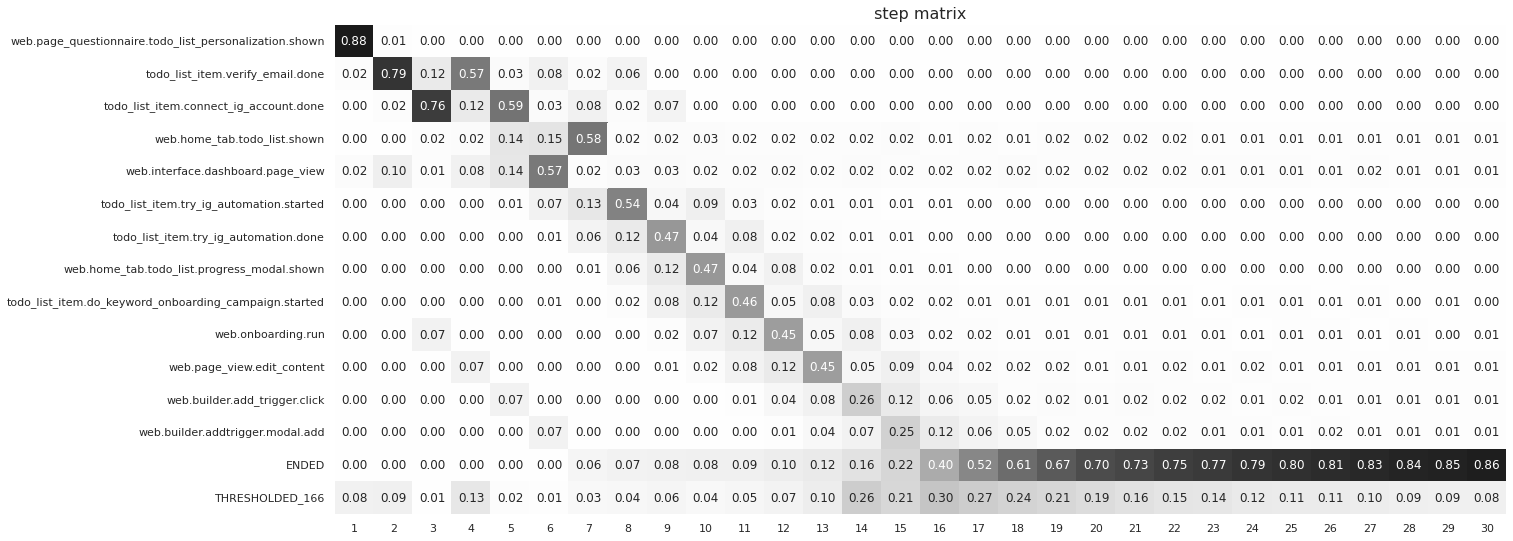

In [ ]:
# Матрица шагов пользователей из кластера 0
df_cluster_0.rete.step_matrix(max_steps=30,
                        thresh=0.15)

In [ ]:
# Воронка пользователй кластера 0
cluster_0_activated_true = df_cluster_0[df_cluster_0.activated == 1].client_id
cluster_0_activated_false = df_cluster_0[df_cluster_0.activated == 0].client_id

df_cluster_0.rete.funnel(targets = ['web.interface.dashboard.page_view',
                                        'todo_list_item.connect_ig_account.done',
                                         'web.onboarding.run',
                                         'todo_list_item.start_trial.done'],
                         groups = (cluster_0_activated_true, cluster_0_activated_false),
                         group_names = ('Активированные пользователи', 'Не активированные пользователи'))

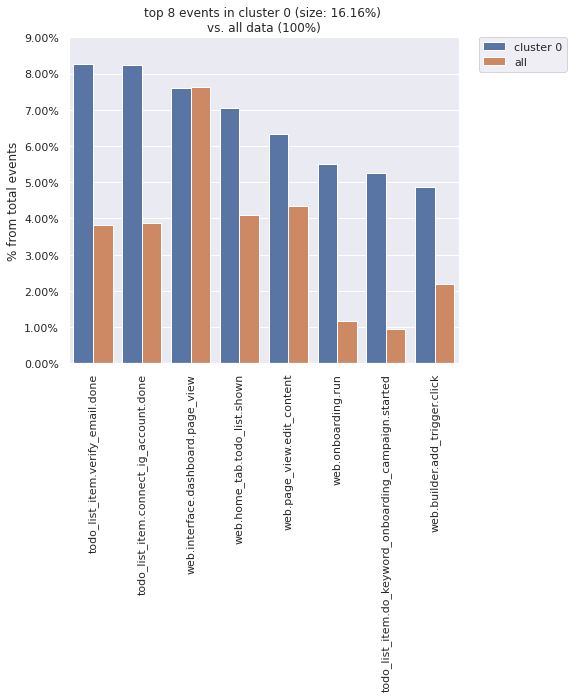

In [ ]:
# Сравнение частоты логов в кластере 0 с другими
df_first_session.rete.cluster_event_dist(0)

### Кластер 1. Опытные пользователи

In [ ]:
# Граф SJM пользователей из кластера 1
df_cluster_1.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.2,
                     targets = {'todo_list_item.start_trial.done' :'green',
                                'todo_list_item.connect_ig_account.done' :'green',
                                'todo_list_item.do_keyword_onboarding_campaign.started':'green',
                                'todo_list_item.start_trial.done' :'green'})

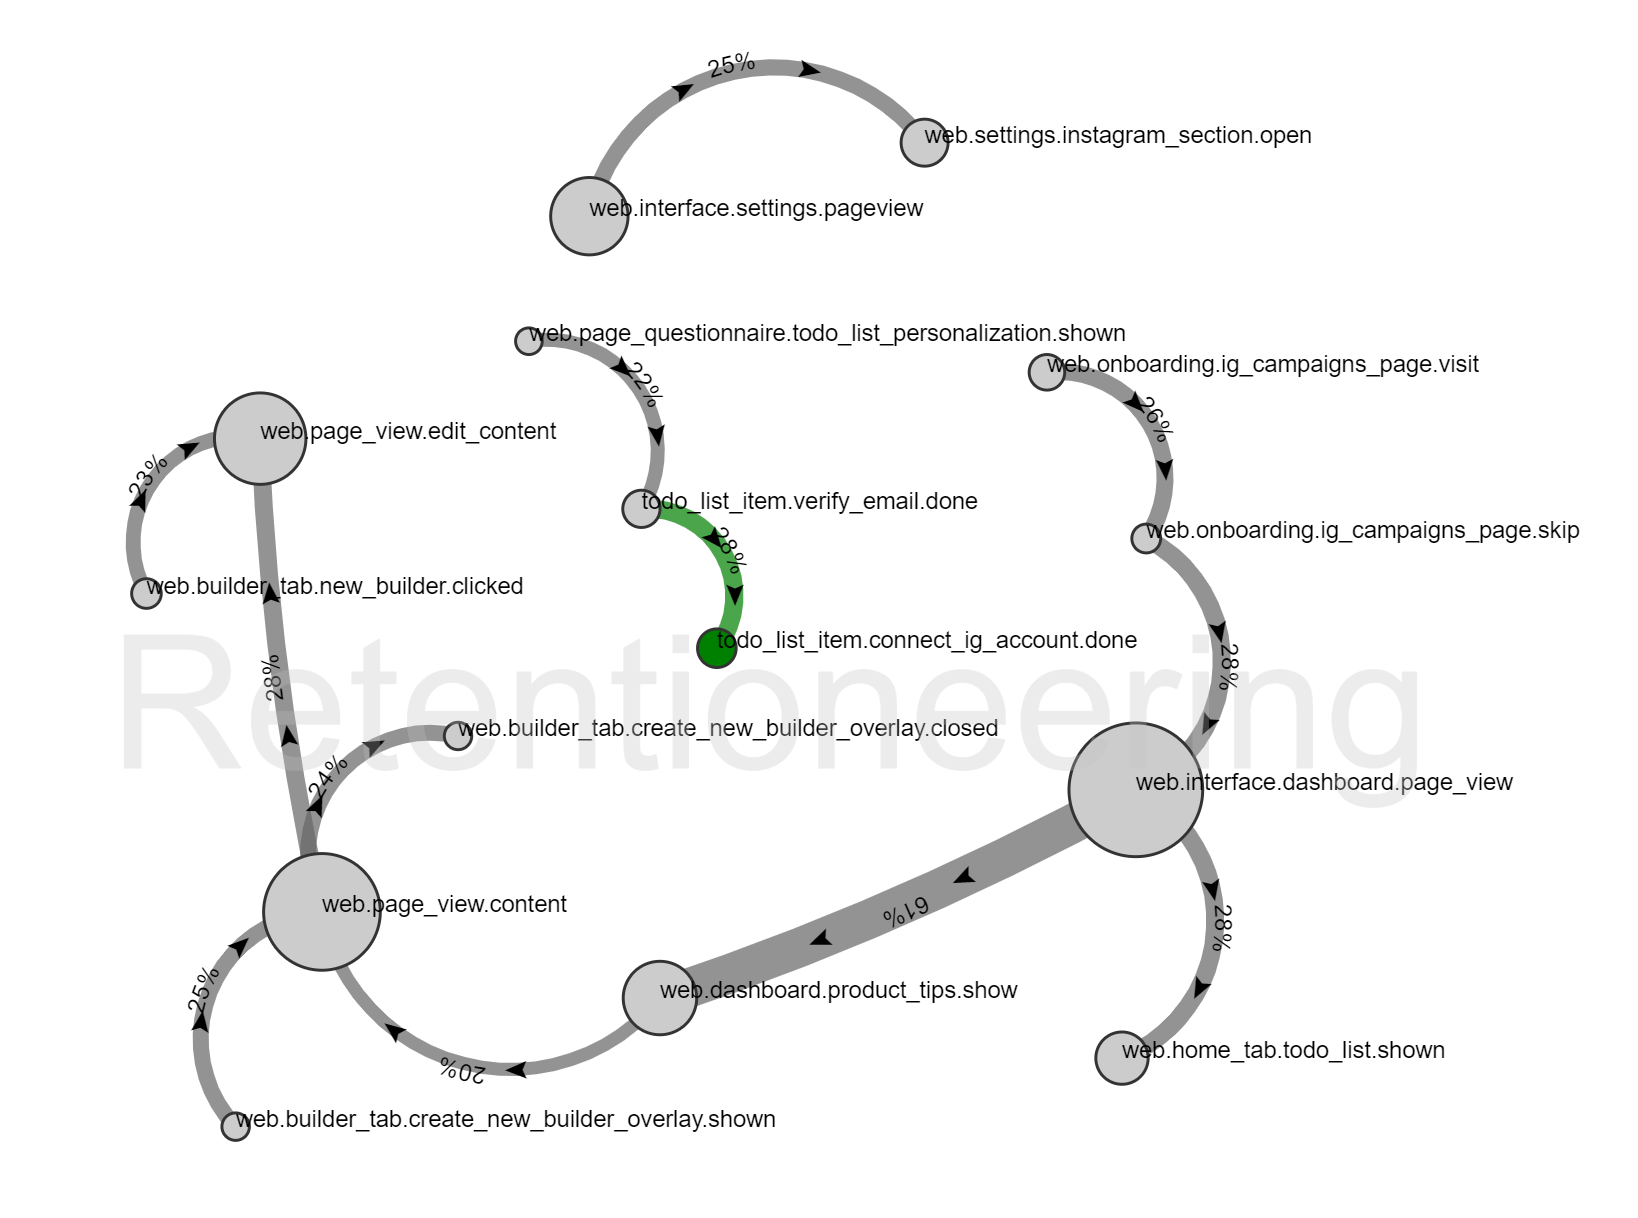

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
web.onboarding.ig_campaigns_page.visit,0.383777,0.011396,0.005866,0.003352,0.005195,0.002179,0.002179,0.002011,0.001341,0.002681,...,0.000503,0.000670,0.001006,0.001006,0.000503,0.000670,0.000335,0.000670,0.000503,0.000335
web.dashboard.product_tips.show,0.000168,0.298978,0.007709,0.219708,0.052120,0.034523,0.036032,0.034356,0.033853,0.029328,...,0.011731,0.013910,0.010726,0.009888,0.011396,0.009553,0.009050,0.009720,0.008882,0.008212
web.interface.dashboard.page_view,0.320764,0.035529,0.319759,0.102061,0.109268,0.204123,0.061840,0.063013,0.061840,0.057818,...,0.029328,0.025976,0.025138,0.026814,0.022960,0.023965,0.023127,0.020949,0.020111,0.018770
todo_list_item.connect_ig_account.done,0.003687,0.025306,0.232110,0.039718,0.156192,0.013742,0.018435,0.005363,0.011228,0.000670,...,0.000335,0.000000,0.000000,0.000000,0.000000,0.000168,0.000000,0.000335,0.000000,0.000168
web.home_tab.todo_list.shown,0.000000,0.002179,0.006871,0.022792,0.049774,0.054131,0.157198,0.011564,0.015921,0.018435,...,0.009888,0.010223,0.008547,0.008547,0.008212,0.007541,0.008044,0.007206,0.008379,0.008379
todo_list_item.verify_email.done,0.009553,0.230266,0.038545,0.150494,0.013407,0.017764,0.005028,0.011061,0.000503,0.000168,...,0.000000,0.000000,0.000000,0.000000,0.000168,0.000000,0.000335,0.000000,0.000168,0.000000
web.onboarding.ig_campaigns_page.skip,0.000000,0.248031,0.017932,0.007541,0.001676,0.003017,0.000335,0.002011,0.000503,0.000670,...,0.000168,0.000168,0.000503,0.000503,0.000838,0.000168,0.000000,0.000168,0.000168,0.000335
web.page_questionnaire.todo_list_personalization.shown,0.238646,0.003184,0.000168,0.000000,0.000000,0.000000,0.000000,0.000168,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENDED,0.000000,0.011228,0.064522,0.105413,0.142283,0.177644,0.212335,0.241495,0.267471,0.294285,...,0.501927,0.518183,0.532093,0.545333,0.558237,0.571644,0.587062,0.600972,0.612871,0.625775
THRESHOLDED_399,0.043405,0.133903,0.306519,0.348919,0.470085,0.492877,0.506620,0.628959,0.607340,0.595944,...,0.446120,0.430870,0.421988,0.407910,0.397687,0.386291,0.372046,0.359980,0.348919,0.338026


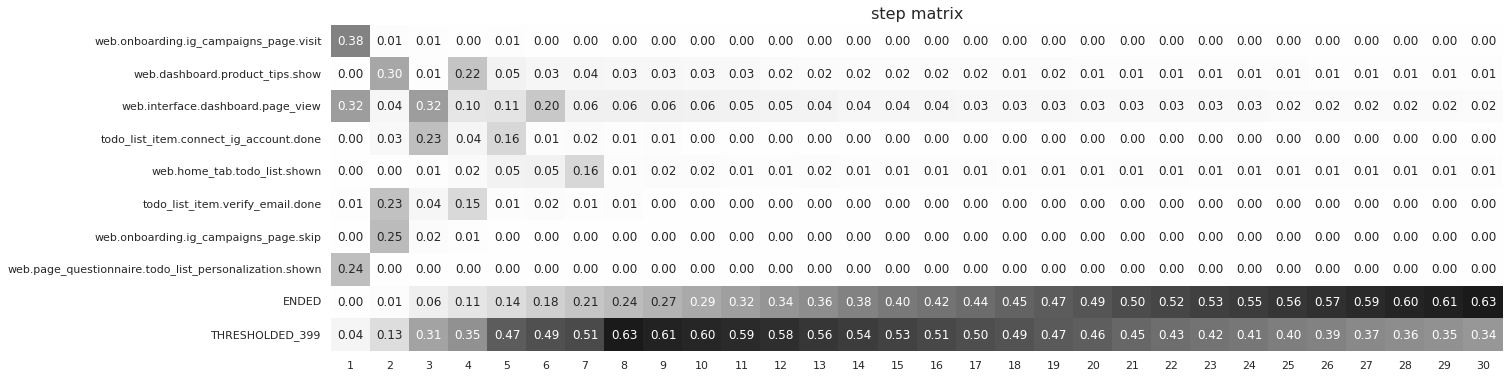

In [ ]:
# Матрица шагов пользователей из кластера 1
df_cluster_1.rete.step_matrix(max_steps=30,
                        thresh=0.1)

In [ ]:
# Воронка пользователй кластера 1
cluster_1_activated_true = df_cluster_1[df_cluster_1.activated == 1].client_id
cluster_1_activated_false = df_cluster_1[df_cluster_1.activated == 0].client_id

df_cluster_1.rete.funnel(targets = ['web.interface.dashboard.page_view',
                                        'todo_list_item.connect_ig_account.done',
                                         'web.onboarding.run',
                                         'todo_list_item.start_trial.done'],
                         groups = (cluster_1_activated_true, cluster_1_activated_false),
                         group_names = ('Активированные пользователи', 'Не активированные пользователи'))

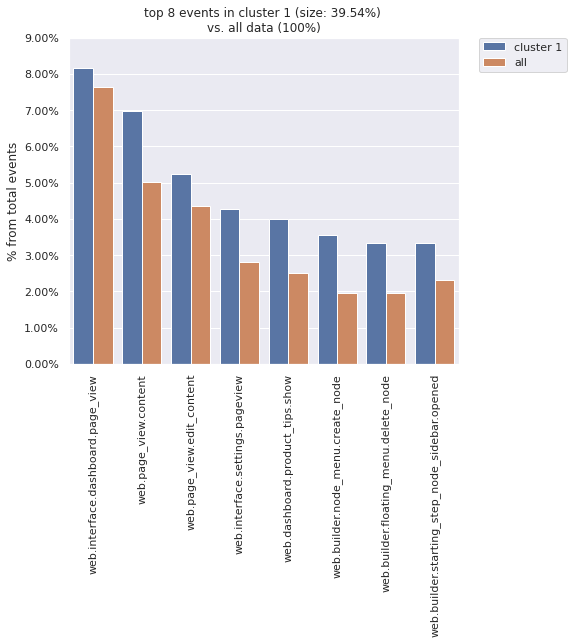

In [ ]:
# Сравнение частоты логов в кластере 1 с другими
df_first_session.rete.cluster_event_dist(1)

### Кластер 2. Мобилки

In [ ]:
# Граф SJM пользователей из кластера 1
df_cluster_2.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.2,
                     targets = {'todo_list_item.start_trial.done' :'green',
                                'todo_list_item.connect_ig_account.done' :'green',
                                'todo_list_item.do_keyword_onboarding_campaign.started':'green',
                                'todo_list_item.start_trial.done' :'green'})

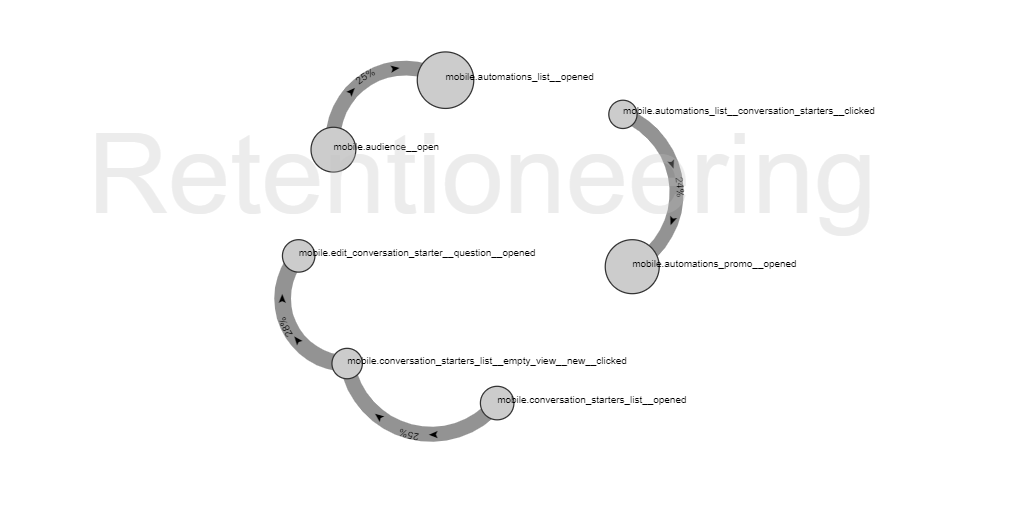

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
mobile.automations_list__opened,0.053097,0.132403,0.123213,0.051055,0.033356,0.022805,0.026549,0.026549,0.025528,0.022464,...,0.006467,0.008509,0.003063,0.002723,0.006127,0.004084,0.004425,0.004084,0.004084,0.003063
mobile.audience__open,0.044588,0.132743,0.046971,0.026889,0.025868,0.022464,0.016338,0.018039,0.023145,0.020082,...,0.007148,0.006807,0.003063,0.006127,0.004765,0.004425,0.004765,0.006467,0.003744,0.004084
mobile.automations_promo__default_reply__setup__clicked,0.121171,0.007488,0.000340,0.003404,0.011913,0.023826,0.014636,0.006127,0.008850,0.006807,...,0.004084,0.002042,0.001702,0.003404,0.002042,0.001702,0.002042,0.000681,0.002383,0.003063
mobile.dialog_list__open,0.278080,0.015997,0.010211,0.014976,0.010892,0.008509,0.007828,0.011913,0.013615,0.012594,...,0.004765,0.002042,0.003404,0.002723,0.002383,0.005106,0.003063,0.001021,0.001702,0.001702
web.page_questionnaire.todo_list_personalization.shown,0.139210,0.001702,0.000340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENDED,0.000000,0.190265,0.219877,0.252553,0.299183,0.359769,0.401634,0.443499,0.472430,0.511913,...,0.782845,0.798162,0.809394,0.820967,0.832539,0.842410,0.852280,0.862151,0.868618,0.876787
THRESHOLDED_280,0.363853,0.519401,0.599047,0.651123,0.618788,0.562628,0.533016,0.493873,0.456433,0.426140,...,0.194690,0.182437,0.179374,0.164057,0.152144,0.142274,0.133424,0.125596,0.119469,0.111300


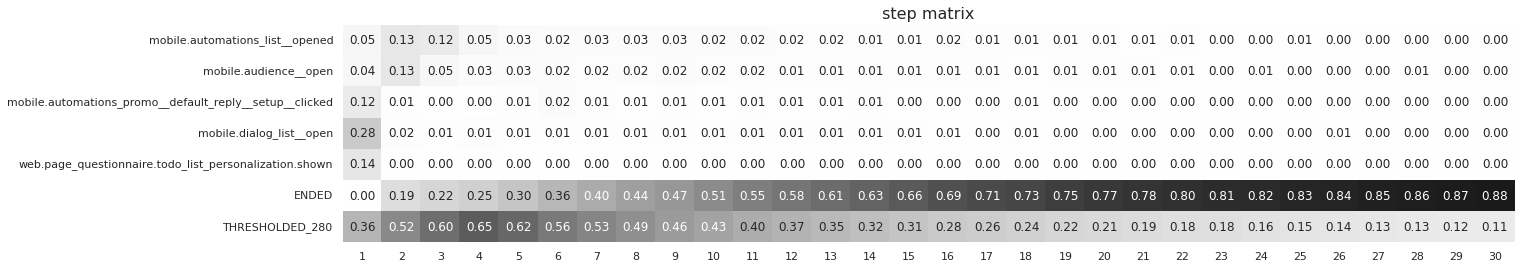

In [ ]:
# Матрица шагов пользователей из кластера 2
df_cluster_2.rete.step_matrix(max_steps=30,
                        thresh=0.1)

In [ ]:
# Воронка пользователей кластера 2
cluster_2_activated_true = df_cluster_2[df_cluster_2.activated == 1].client_id
cluster_2_activated_false = df_cluster_2[df_cluster_2.activated == 0].client_id

df_cluster_2.rete.funnel(targets = ['web.interface.dashboard.page_view',
                                        'todo_list_item.connect_ig_account.done',
                                         'web.onboarding.run',
                                         'todo_list_item.start_trial.done'],
                         groups = (cluster_2_activated_true, cluster_2_activated_false),
                         group_names = ('Активированные пользователи', 'Не активированные пользователи'))

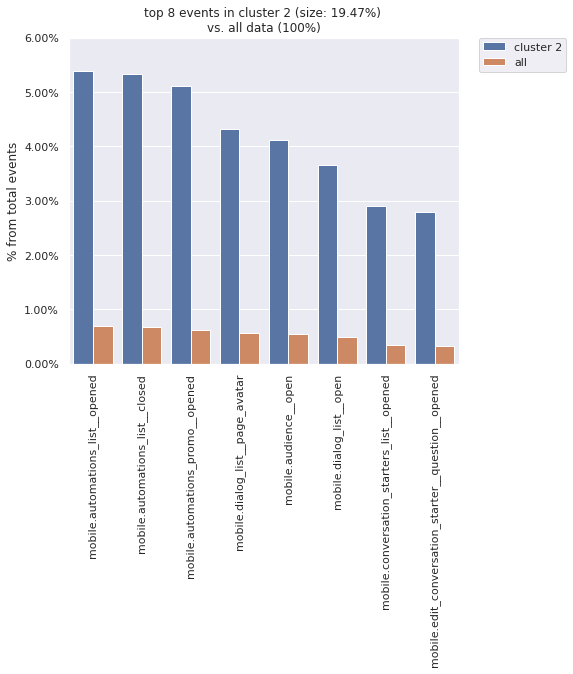

In [ ]:
# Сравнение частоты логов в кластере 2 с другими
df_first_session.rete.cluster_event_dist(2)

### Кластер 3. Без прохождения онбординга

In [ ]:
# Граф SJM пользователей из кластера 3
df_cluster_3.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.2,
                     targets = {'todo_list_item.start_trial.done' :'green',
                                'todo_list_item.connect_ig_account.done' :'green',
                                'todo_list_item.do_keyword_onboarding_campaign.started':'green',
                                'todo_list_item.start_trial.done' :'green'})

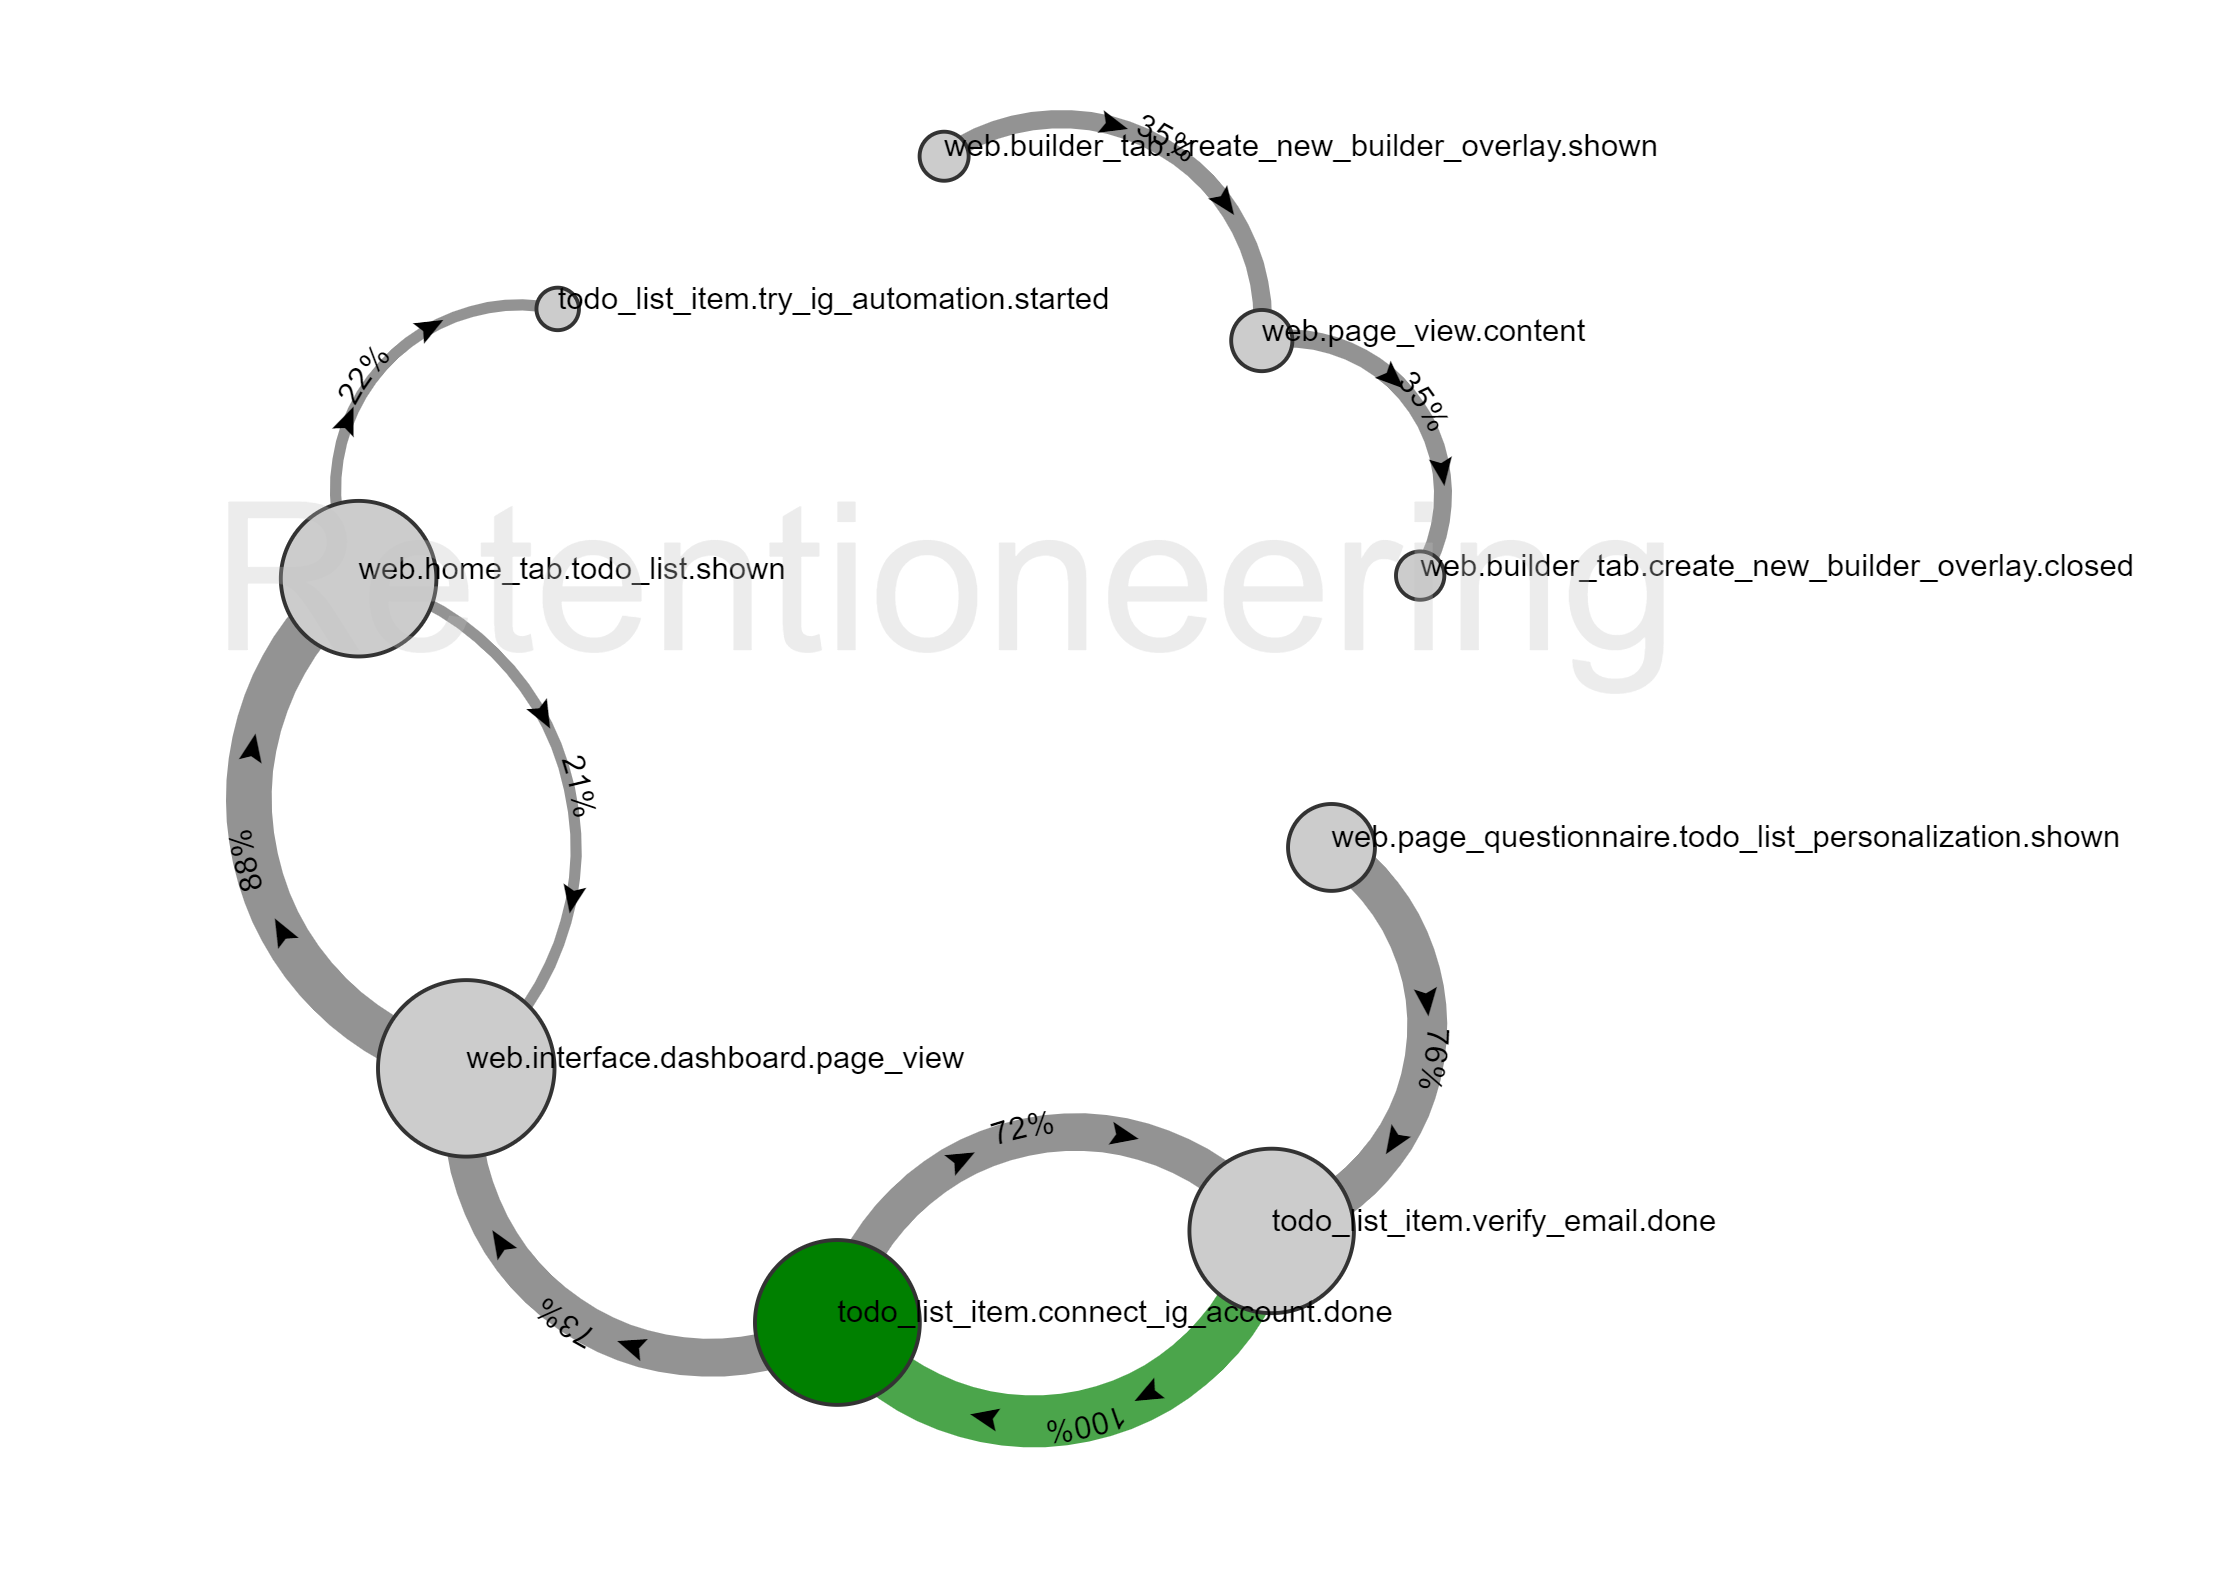

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
web.page_questionnaire.todo_list_personalization.shown,0.860304,0.009336,0.000346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.verify_email.done,0.062241,0.790111,0.180498,0.616183,0.065698,0.079530,0.021784,0.070539,0.002420,0.001729,...,0.000346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.connect_ig_account.done,0.004149,0.062241,0.762102,0.181189,0.643154,0.065007,0.079876,0.022476,0.071231,0.002420,...,0.000000,0.000346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
web.home_tab.todo_list.shown,0.000000,0.010719,0.022476,0.052905,0.127593,0.115145,0.638658,0.047026,0.061203,0.075726,...,0.017635,0.018672,0.014869,0.012448,0.011757,0.010719,0.013140,0.010373,0.008990,0.007607
web.interface.dashboard.page_view,0.070194,0.100622,0.024550,0.053942,0.095090,0.628631,0.058437,0.099585,0.089212,0.087483,...,0.024205,0.019018,0.020055,0.017289,0.018672,0.016943,0.013140,0.009682,0.010373,0.010373
todo_list_item.try_ig_automation.started,0.000000,0.000000,0.000000,0.000692,0.014523,0.011757,0.017289,0.146611,0.012448,0.033195,...,0.000692,0.001037,0.001037,0.000000,0.000346,0.000000,0.001037,0.000346,0.000346,0.000346
web.page_view.content,0.000000,0.000000,0.000000,0.000346,0.000692,0.002075,0.008299,0.023513,0.115145,0.054979,...,0.010028,0.008990,0.010719,0.006224,0.006224,0.003804,0.005533,0.002075,0.004841,0.002420
web.builder_tab.create_new_builder_overlay.closed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000692,0.001383,0.007953,0.022130,0.111687,...,0.006224,0.002766,0.003458,0.003112,0.001037,0.001383,0.000692,0.001729,0.000692,0.000692
web.builder_tab.create_new_builder_overlay.shown,0.000000,0.000000,0.000000,0.000692,0.001729,0.007607,0.019710,0.115837,0.048755,0.034578,...,0.003458,0.003804,0.001037,0.001729,0.000692,0.001729,0.000692,0.001037,0.000346,0.000000
ENDED,0.000000,0.001383,0.003804,0.007261,0.030429,0.055671,0.099931,0.258299,0.326072,0.386584,...,0.825380,0.849931,0.868603,0.884163,0.900069,0.911134,0.920124,0.931881,0.940526,0.946404


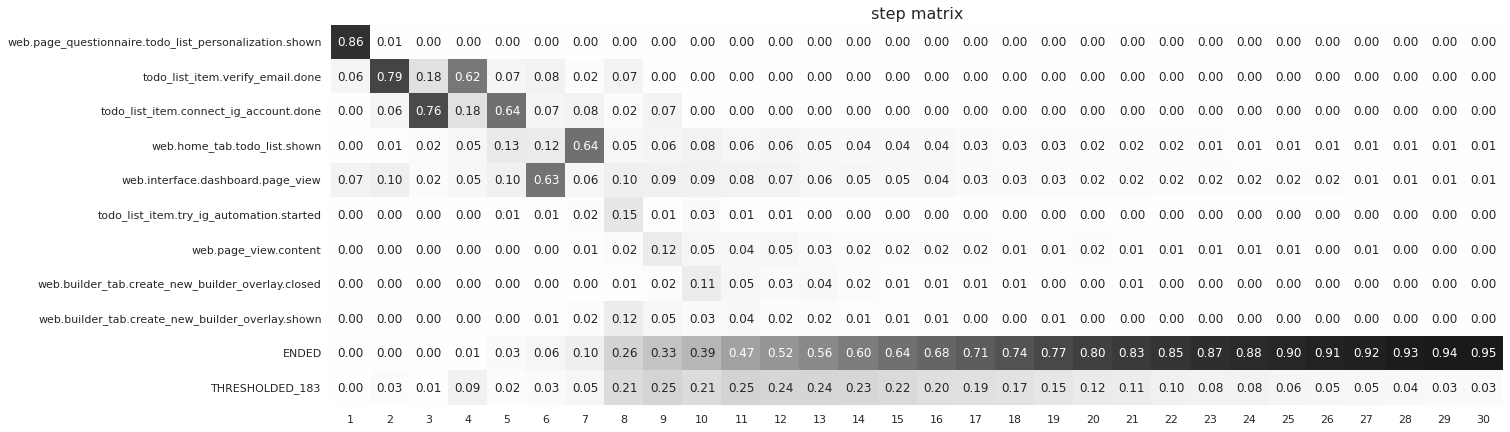

In [ ]:
# Матрица шагов пользователей из кластера 3
df_cluster_3.rete.step_matrix(max_steps=30,
                        thresh=0.1)

In [ ]:
# Воронка пользователй кластера 3
cluster_3_activated_true = df_cluster_3[df_cluster_3.activated == 1].client_id
cluster_3_activated_false = df_cluster_3[df_cluster_3.activated == 0].client_id

df_cluster_3.rete.funnel(targets = ['web.interface.dashboard.page_view',
                                        'todo_list_item.connect_ig_account.done',
                                         'web.onboarding.run',
                                         'todo_list_item.start_trial.done'],
                         groups = (cluster_3_activated_true, cluster_3_activated_false),
                         group_names = ('Активированные пользователи', 'Не активированные пользователи'))


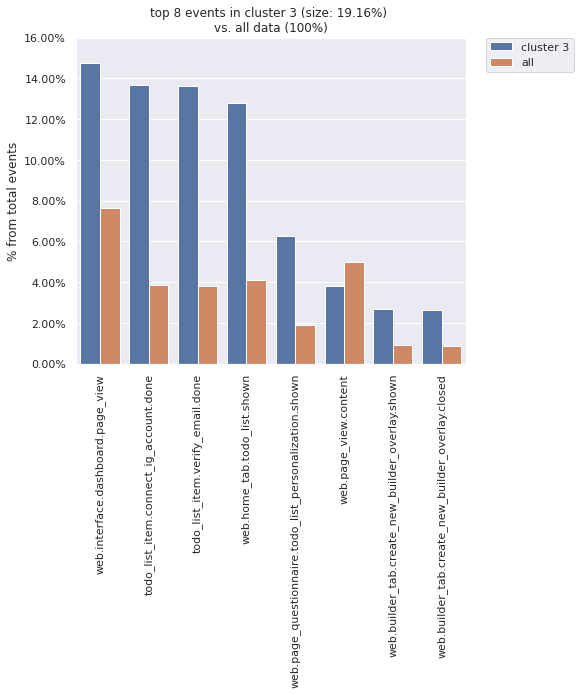

In [ ]:
# Сравнение частоты логов в кластере 3 с другими
df_first_session.rete.cluster_event_dist(3)

### Кластер 4. Контруктора бота

In [ ]:
# Граф SJM пользователей из кластера 4
df_cluster_4.rete.plot_graph(norm_type='full',
                     weight_col='client_id',
                     thresh=0.5,
                     targets = {'todo_list_item.start_trial.done' :'green',
                                'todo_list_item.connect_ig_account.done' :'green',
                                'todo_list_item.do_keyword_onboarding_campaign.started':'green',
                                'todo_list_item.start_trial.done' :'green'})

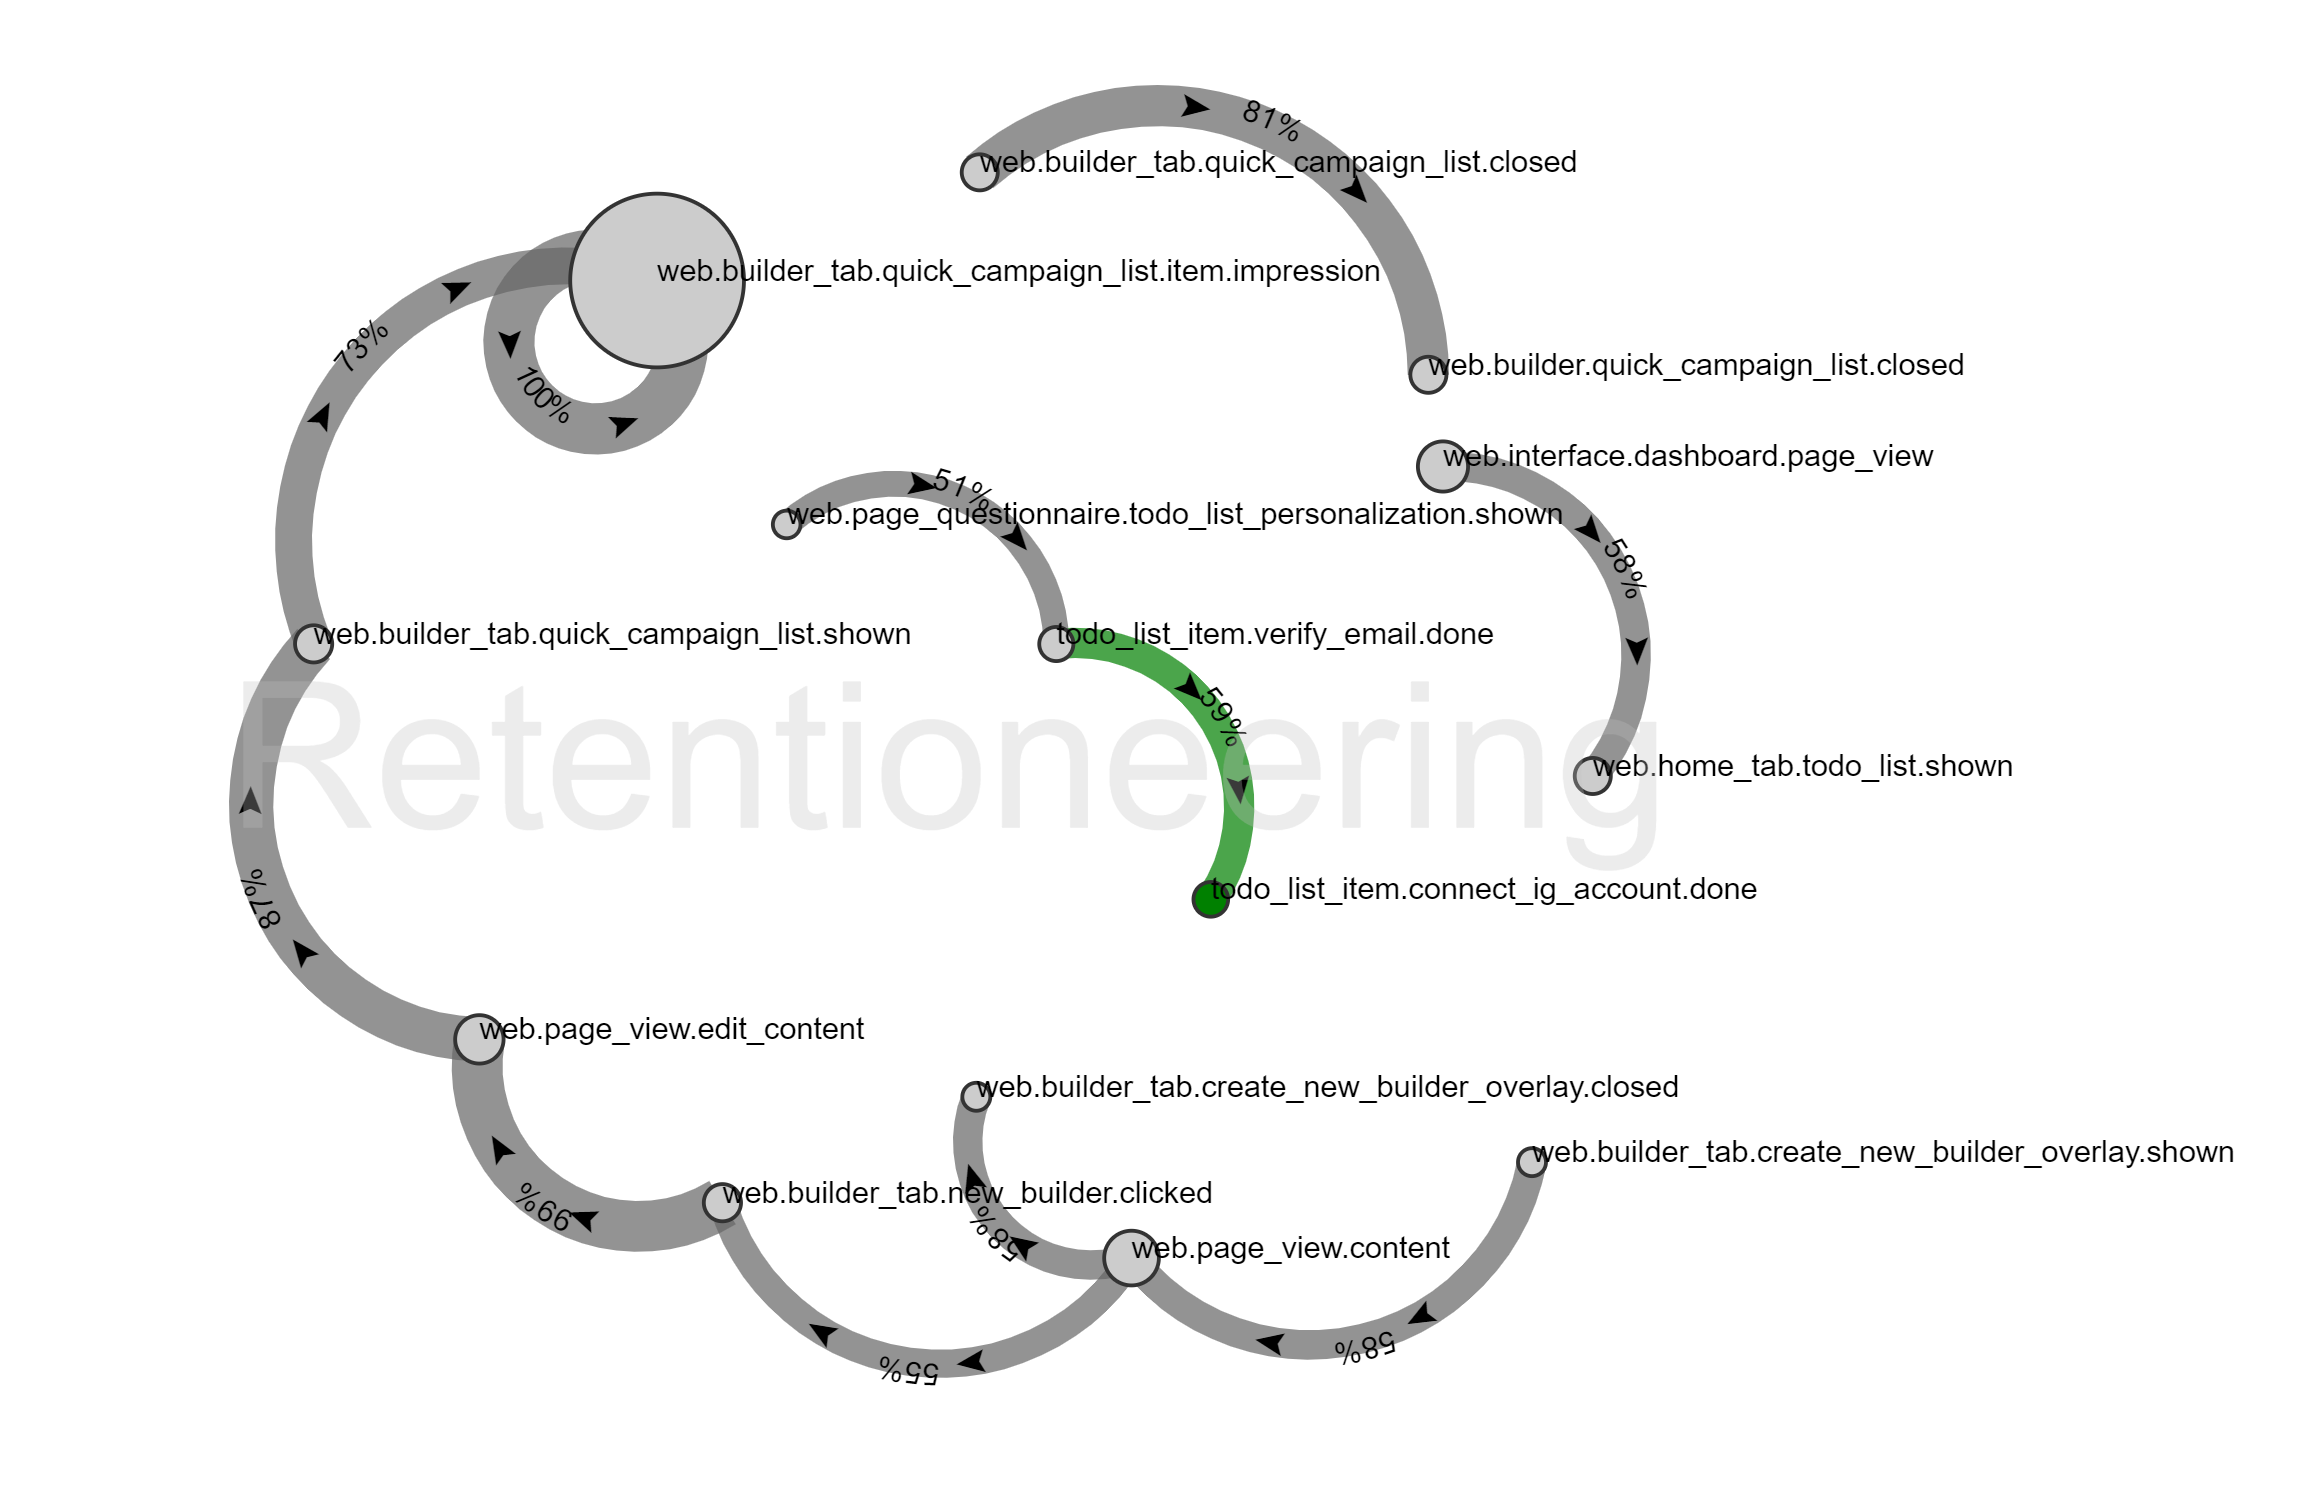

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
web.page_questionnaire.todo_list_personalization.shown,0.569591,0.009357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.verify_email.done,0.003509,0.507602,0.071345,0.384795,0.018713,0.057310,0.010526,0.047953,0.002339,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
todo_list_item.connect_ig_account.done,0.003509,0.014035,0.516959,0.077193,0.391813,0.018713,0.057310,0.010526,0.047953,0.002339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
web.interface.dashboard.page_view,0.294737,0.067836,0.141520,0.088889,0.107602,0.409357,0.037427,0.056140,0.056140,0.047953,...,0.011696,0.009357,0.014035,0.008187,0.017544,0.009357,0.009357,0.015205,0.012865,0.012865
web.home_tab.todo_list.shown,0.000000,0.002339,0.026901,0.025731,0.098246,0.083041,0.388304,0.014035,0.025731,0.023392,...,0.000000,0.005848,0.004678,0.009357,0.004678,0.007018,0.007018,0.004678,0.007018,0.005848
web.builder_tab.quick_campaign_list.item.impression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076023,0.114620,0.164912,0.163743,...,0.169591,0.166082,0.148538,0.155556,0.145029,0.141520,0.134503,0.127485,0.132164,0.114620
web.page_view.content,0.000000,0.000000,0.142690,0.053801,0.083041,0.052632,0.051462,0.069006,0.173099,0.116959,...,0.025731,0.016374,0.023392,0.023392,0.019883,0.022222,0.015205,0.016374,0.018713,0.015205
web.dashboard.product_tips.show,0.000000,0.277193,0.002339,0.099415,0.029240,0.011696,0.012865,0.022222,0.026901,0.019883,...,0.002339,0.002339,0.002339,0.002339,0.003509,0.005848,0.002339,0.003509,0.004678,0.003509
ENDED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.403509,0.421053,0.439766,0.461988,0.476023,0.491228,0.509942,0.528655,0.542690,0.552047
THRESHOLDED_205,0.128655,0.121637,0.098246,0.270175,0.271345,0.367251,0.366082,0.665497,0.502924,0.625731,...,0.387135,0.378947,0.367251,0.339181,0.333333,0.322807,0.321637,0.304094,0.281871,0.295906


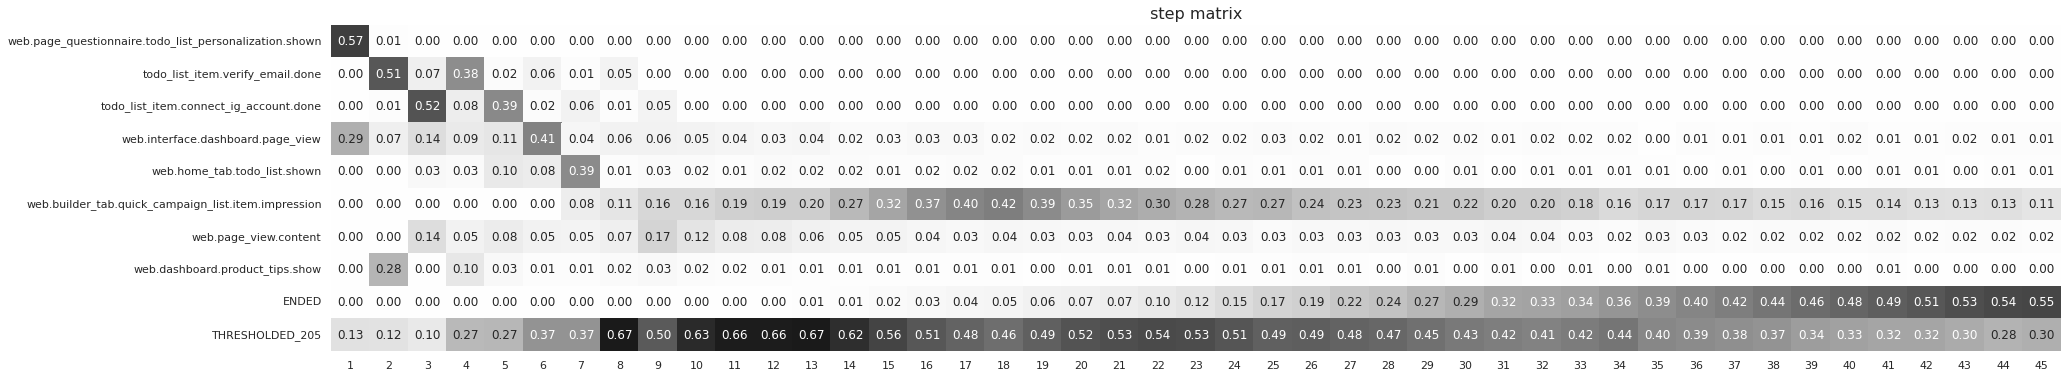

In [ ]:
# Матрица шагов пользователей из кластера 4
df_cluster_4.rete.step_matrix(max_steps=45,
                        thresh=0.15)

In [ ]:
# Воронка пользователй кластера 4
cluster_4_activated_true = df_cluster_4[df_cluster_4.activated == 1].client_id
cluster_4_activated_false = df_cluster_4[df_cluster_4.activated == 0].client_id

df_cluster_4.rete.funnel(targets = ['web.interface.dashboard.page_view',
                                        'todo_list_item.connect_ig_account.done',
                                         'web.onboarding.run',
                                         'todo_list_item.start_trial.done'],
                         groups = (cluster_4_activated_true, cluster_4_activated_false),
                         group_names = ('Активированные пользователи', 'Не активированные пользователи'))

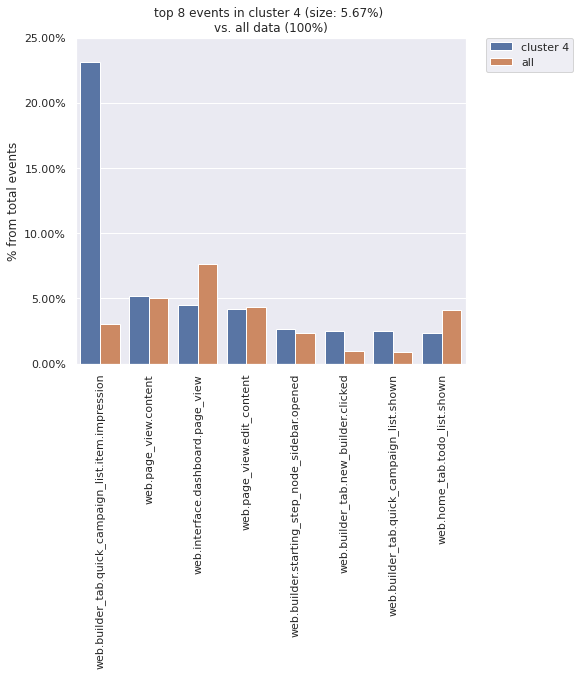

In [ ]:
# Сравнение кластера 4 со всеми
df_first_session.rete.cluster_event_dist(4)

## ЗАДАЧА 4.
Сформулировать рекомендации: какие сегменты стоит брать в первую очередь и почему.

**Кластеры для фокуса.** \
В первую очередь обратим внимание на 2 проблемных кластера: 2 (Мобилки) и 0 (Активно обучающиеся).  Не трогая кластеры, где уровни активации и подписок на высоком уровне.

**Рекомендации:** \
1. Кластер 2 (Мобилки) - 2938 пользоватлей (20 %). \
В данном кластере 99% пользователей с инстаграмма и среднее количество подписчиков 11000. Что может говорить о том, что значительная часть пользователей может быть с бизнес-аккаунтами, для которых мобильная платформа является единственным устройством. Однако возможность прохождения онбординга для мобильных пользователей отсутствует(в логах отсутствует такая возможность). И доля активированных пользователей в данном кластере только 5.1%. Хотя у 15 % пользователей данного кластера, кто пользовался веб версией платформы, процент активированных пользователй в 3 раза выше(присутствовала возможность прохождения веб онбординга). **Поэтому необходимо провести доп. исследования в этой группе. И при подтвержении данной рекоммендации расширить функционал мобильной версии, в частности добавить возможность прохождения онбординга.**

2. Кластер 0 (Активно обучающиеся) - 2439 пользоватлей (16%). \
Кластер с 16% пользователей активно проходит онбординг и изучает всевозможный функционал продукта. 31.9% пользователей подключают триал версию, что является одним из самых высоких значений. Но имеет крайне низкий уровень активации 3.4%. Что говорит о том, что пользователи в не будут ощущать ценности продукта. **Поэтому в данном класте в первую очередь должно проводиться исследование уровня удовлетворенности продуктом/функционалами продукта. Что позволит усилить слабые места платформы. А также ударжать часть пользователей крайне перспективного кластера.**


